# Milestone P2

# 1. Loading the datasets 

In [4]:
from matplotlib.dates import DateFormatter, YearLocator
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [5]:
data_path = "data"

In [6]:
# Channel data en
df_channels_en = pd.read_csv(os.path.join(data_path, "df_channels_en.tsv.gz"), compression="infer", sep="\t")
print(f"df_channels_en shape: {df_channels_en.shape}")
df_channels_en.head()

df_channels_en shape: (136470, 8)


,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.087
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.087
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.087
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.087


In [7]:
# Time series data en
df_timeseries_en = pd.read_csv(os.path.join(data_path, "df_timeseries_en.tsv.gz"), compression="infer", sep="\t")

df_timeseries_en

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03 00:00:00,2.024946e+05,0.000000,650.222222,0.000000,5,0,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10 00:00:00,3.940857e+05,191591.111111,1046.000000,395.777778,6,1,1
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17 00:00:00,8.353938e+05,441308.083333,1501.500000,455.500000,6,0,1
3,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-24 00:00:00,1.104577e+06,269183.250000,1750.000000,248.500000,6,0,0
4,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-31 00:00:00,1.284406e+06,179828.600000,2008.300000,258.300000,6,0,0
...,...,...,...,...,...,...,...,...,...,...
18872494,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-02 00:00:00,6.012938e+06,232418.277778,61268.611111,1305.611111,278,2,10
18872495,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-09 00:00:00,6.244579e+06,231640.888889,62631.666667,1363.055556,287,9,13
18872496,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-16 00:00:00,6.480902e+06,236322.933333,64010.000000,1378.333333,294,7,16
18872497,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-23 00:00:00,6.745317e+06,264415.200000,65480.000000,1470.000000,301,7,15


In [8]:
num_comments = pd.read_csv(os.path.join(data_path, "num_comments.tsv.gz"), compression="infer", sep="\t")
print(f"num_comments shape: {num_comments.shape}")
num_comments.head()

num_comments shape: (72924794, 2)


,display_id,num_comms
0,SBqSc91Hn9g,0.0
1,UuugEl86ESY,0.0
2,oB4c-yvnbjs,48.0
3,ZaV-gTCMV8E,6.0
4,cGvL7AvMfM0,5.0


In [9]:
num_comments_authors = pd.read_csv(os.path.join(data_path, "num_comments_authors.tsv.gz"), compression="infer", sep="\t")
print(f"num_comments_authors shape: {num_comments_authors.shape}")
num_comments_authors.head()

num_comments_authors shape: (448810483, 2)


,author,video_id
0,1,5
1,2,3
2,3,2
3,4,6
4,5,3


In [10]:
video_meta = pd.read_feather(os.path.join(data_path, "yt_metadata_helper.feather"))
print(f"video_meta shape: {video_meta.shape}")
print(video_meta.head())

video_meta shape: (72924794, 8)
         categories                channel_id  dislike_count   display_id  \
0  Film & Animation  UCzWrhkg9eK5I8Bm3HfV-unA            1.0  SBqSc91Hn9g   
1  Film & Animation  UCzWrhkg9eK5I8Bm3HfV-unA            1.0  UuugEl86ESY   
2  Film & Animation  UCzWrhkg9eK5I8Bm3HfV-unA          779.0  oB4c-yvnbjs   
3  Film & Animation  UCzWrhkg9eK5I8Bm3HfV-unA           24.0  ZaV-gTCMV8E   
4  Film & Animation  UCzWrhkg9eK5I8Bm3HfV-unA           13.0  cGvL7AvMfM0   

   duration  like_count upload_date  view_count  
0      1159         8.0  2016-09-28      1057.0  
1      2681        23.0  2016-09-28     12894.0  
2      1394      1607.0  2016-09-28   1800602.0  
3      5064       227.0  2016-09-28     57640.0  
4      3554       105.0  2016-09-28     86368.0  


# 2. Exploratory Data analysis

## 2.1. Data overview

### 2.1.1. Channel dataset: df_channels_en

This dataset contains the following columns:
- category_cc: category of the channel.
- join_date: join date of the channel.
- channel: channel id.
- name_cc: name of the channel.
- subscribers_cc: number of subscribers.
- videos_cc: number of videos.
- subscriber_rank_sb: rank in terms of number of subscribers.
- weights: weights calculated for each channel.

In [11]:
# Shape
df_channels_en.shape

(136470, 8)

In [12]:
df_channels_en.head()

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.087
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.087
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.087
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.087


In [13]:
# Types of the columns
df_channels_en.dtypes

category_cc            object
join_date              object
channel                object
name_cc                object
subscribers_cc          int64
videos_cc               int64
subscriber_rank_sb    float64
weights               float64
dtype: object

Here, join_date appears to be an object. We will convert it into "datetime".

In [14]:
df_channels_en["join_date"] = pd.to_datetime(df_channels_en["join_date"])

In [15]:
df_channels_en.describe()

,join_date,subscribers_cc,videos_cc,subscriber_rank_sb,weights
count,136469,1.364700e+05,136470.000000,1.364700e+05,136470.000000
mean,2013-04-24 16:26:40.926217984,2.466022e+05,699.784231,3.570087e+05,7.349363
min,2004-09-16 00:00:00,1.000000e+04,10.000000,3.000000e+00,2.086500
25%,2010-12-20 00:00:00,1.888575e+04,70.000000,1.161305e+05,4.231500
50%,2013-09-24 00:00:00,4.240000e+04,175.000000,3.015670e+05,6.444000
75%,2016-02-14 00:00:00,1.370000e+05,443.000000,5.704942e+05,9.243500
max,2019-08-23 00:00:00,1.121395e+08,461923.000000,1.030844e+06,53.150500
std,NaN,1.150096e+06,4524.980928,2.711139e+05,5.277328


- We have 15 unique categories
- The dataset contains channel informations spanning 2004 to 2019 (earliest join date 2004-09-2016 and latest 2019-08-23)
- We have 136470 channels

In [16]:
# The categories present in the dataset
df_channels_en["category_cc"].unique()

array(['Gaming', 'Education', 'Entertainment', 'Howto & Style', 'Sports',
       'Music', 'Film and Animation', 'Comedy', 'Nonprofits & Activism',
       'People & Blogs', 'News & Politics', 'Science & Technology',
       'Pets & Animals', 'Autos & Vehicles', 'Travel & Events', nan],
      dtype=object)

#### Missing data 

In [17]:
missing_data_df_channels = df_channels_en.isna().sum()
missing_data_df_channels

category_cc           128
join_date               1
channel                 0
name_cc                10
subscribers_cc          0
videos_cc               0
subscriber_rank_sb      0
weights                 0
dtype: int64

The shape of df_channels_en is (136470, 8)


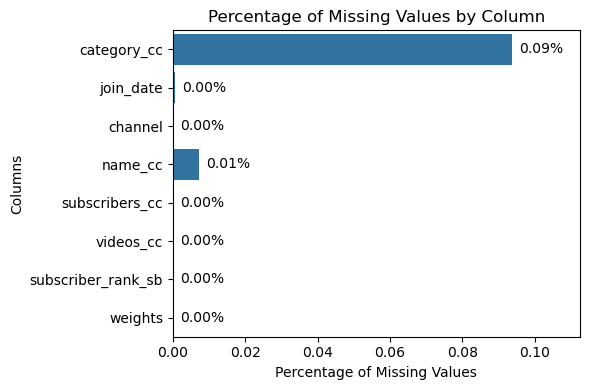

In [18]:
# df_channels
print(f"The shape of df_channels_en is {df_channels_en.shape}")
missing_values_df_channels_en = df_channels_en.apply(lambda x: x.isna().sum(axis=0) / df_channels_en.shape[0] * 100)

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=missing_values_df_channels_en.values, y=missing_values_df_channels_en.index, orient='h')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.title('Percentage of Missing Values by Column')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', padding=5) 
plt.xlim(0, max(missing_values_df_channels_en.values) * 1.2)
plt.tight_layout()
plt.show()

In [19]:
# Looking for duplicated rows
df_channels_en.duplicated().sum()

0

### 2.1.2. Time series dataset : df_timeseries_en

The columns of df_timeseries_en are:  
- channel: channel id.
- category: category of the channel as assigned by socialblade.com according to the last 10 videos at time of crawl.
- datetime: Week related to the data point.
- views: Total number of views the channel had this week (cumulative).
- delta_views: Delta views obtained this week. It is the number of views obtained only this week.
- subs: Total number of subscribers the channel had this week (cumulative).
- delta_subs: Delta subscribers obtained this week. It is the number of subscribers obtained only this week.
- videos: Total number of videos the channel had this week. It is the cumulative number of videos the channel has uploaded.
- delta_videos: Delta videos obtained this week. It is the number of new videos uploaded only this week.
- activity: Number of videos published in the last 15 days.

In [20]:
# Shape
df_timeseries_en.shape

(18872499, 10)

In [21]:
df_timeseries_en.head()

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03 00:00:00,2.024946e+05,0.000000,650.222222,0.000000,5,0,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10 00:00:00,3.940857e+05,191591.111111,1046.000000,395.777778,6,1,1
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17 00:00:00,8.353938e+05,441308.083333,1501.500000,455.500000,6,0,1
3,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-24 00:00:00,1.104577e+06,269183.250000,1750.000000,248.500000,6,0,0
4,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-31 00:00:00,1.284406e+06,179828.600000,2008.300000,258.300000,6,0,0


In [22]:
# Types of the columns
df_timeseries_en.dtypes

channel          object
category         object
datetime         object
views           float64
delta_views     float64
subs            float64
delta_subs      float64
videos            int64
delta_videos      int64
activity          int64
dtype: object

In [23]:
# Convert the column datetime to "datetime"
df_timeseries_en["datetime"] = pd.to_datetime(df_timeseries_en["datetime"])

In [24]:
df_timeseries_en.describe()

,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
count,18872499,1.887250e+07,1.887250e+07,1.887250e+07,1.887250e+07,1.887250e+07,1.887250e+07,1.887250e+07
mean,2018-04-03 00:21:49.005848576,4.515185e+07,3.818116e+05,1.527369e+05,1.312787e+03,4.140162e+02,2.210536e+00,4.916308e+00
min,2015-01-05 00:00:00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2017-07-03 00:00:00,1.330733e+06,9.197109e+03,9.033000e+03,3.375000e+01,4.100000e+01,0.000000e+00,0.000000e+00
50%,2018-04-23 00:00:00,4.665598e+06,3.356228e+04,2.090667e+04,1.247250e+02,1.220000e+02,0.000000e+00,1.000000e+00
75%,2019-01-20 23:00:00,1.628815e+07,1.309393e+05,7.057127e+04,5.147500e+02,3.340000e+02,2.000000e+00,4.000000e+00
max,2019-09-30 01:00:00,8.411483e+10,6.659719e+09,1.125714e+08,2.061360e+07,1.418270e+05,3.158000e+04,3.159700e+04
std,NaN,3.633229e+08,4.062719e+06,8.073176e+05,1.864629e+04,1.439843e+03,1.469852e+01,2.998487e+01


The time series date has :
- 133516 channels
- 15 unique categories
- Earliest date is 2015-01-05 and latest is 2019-09-30

#### Missing data

In [25]:
missing_data_df_timeseries = df_timeseries_en.isna().sum()
missing_data_df_timeseries

channel             0
category        20584
datetime            0
views               0
delta_views         0
subs                0
delta_subs          0
videos              0
delta_videos        0
activity            0
dtype: int64

The shape of df_timeseries_en is (18872499, 10)


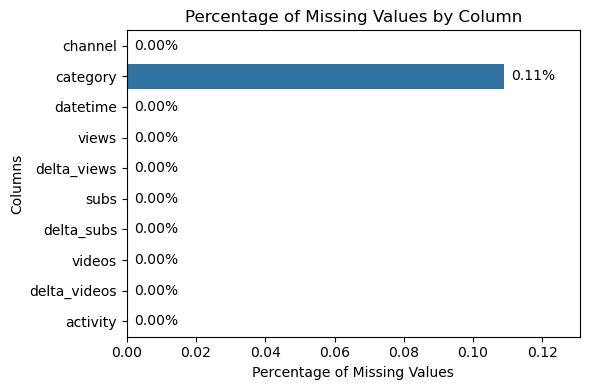

In [26]:
print(f"The shape of df_timeseries_en is {df_timeseries_en.shape}")
missing_values_df_timeseries_en = df_timeseries_en.apply(lambda x: x.isna().sum(axis=0) / df_timeseries_en.shape[0] * 100)

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=missing_values_df_timeseries_en.values, y=missing_values_df_timeseries_en.index, orient='h')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.title('Percentage of Missing Values by Column')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', padding=5)
plt.xlim(0, max(missing_values_df_timeseries_en.values) * 1.2)
plt.tight_layout()
plt.show()

##### The big file "youtube_comments.tsv.gz" was processed in multiple pass to generate the two dataframe : "num_comments" and "num_comments_author"

### 2.1.3. Comment dataset 1: num_comments

Contains the count of comments per video

- display_id: id of the user. 
- num_comms: Number of comments per videos.

In [27]:
num_comments.shape

(72924794, 2)

In [28]:
num_comments.head()

,display_id,num_comms
0,SBqSc91Hn9g,0.0
1,UuugEl86ESY,0.0
2,oB4c-yvnbjs,48.0
3,ZaV-gTCMV8E,6.0
4,cGvL7AvMfM0,5.0


In [29]:
num_comments.dtypes

display_id     object
num_comms     float64
dtype: object

In [30]:
num_comments.describe()

,num_comms
count,7.292479e+07
mean,1.217165e+02
std,1.343391e+03
min,0.000000e+00
25%,0.000000e+00
50%,5.000000e+00
75%,3.900000e+01
max,1.125155e+06


In [31]:
missing_values_num_comments = num_comments.apply(lambda x: x.isna().sum(axis=0) / num_comments.shape[0] * 100)
print(f"Missing values for num_comments: {missing_values_num_comments}")

Missing values for num_comments: display_id    0.0
num_comms     0.0
dtype: float64


### 2.1.4. Comments dataset 2: num_comments_authors

Contains the count of comments per video per author (user)
- author: user id
- video_id:  Number of comments per user.


In [32]:
num_comments_authors.shape

(448810483, 2)

In [33]:
num_comments_authors.head()

,author,video_id
0,1,5
1,2,3
2,3,2
3,4,6
4,5,3


In [34]:
num_comments_authors.dtypes

author      int64
video_id    int64
dtype: object

In [35]:
num_comments_authors.describe()

,author,video_id
count,4.488105e+08,4.488105e+08
mean,2.882777e+08,1.917428e+01
std,1.664337e+08,1.406534e+02
min,1.000000e+00,1.000000e+00
25%,1.441397e+08,1.000000e+00
50%,2.882794e+08,2.000000e+00
75%,4.324085e+08,8.000000e+00
max,5.765520e+08,3.520200e+05


In [36]:
missing_values_num_comments_authors = num_comments_authors.apply(lambda x: x.isna().sum(axis=0) / num_comments_authors.shape[0] * 100)
print(f"Missing values for num_comments_authors: {missing_values_num_comments_authors}")

Missing values for num_comments_authors: author      0.0
video_id    0.0
dtype: float64


### 2.1.5. Videos dataset : video_meta 

- channel: channel id.
- datetime: Week related to the data point.
- duration: Duration of the video.
- views: Total number of views the video had this week.
- likes: Total number of likes the video had this week.
- dislikes: Total number of dislikes the video had this week.

In [37]:
video_meta.shape

(72924794, 8)

In [38]:
video_meta.head()

,categories,channel_id,dislike_count,display_id,duration,like_count,upload_date,view_count
0,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,1.0,SBqSc91Hn9g,1159,8.0,2016-09-28,1057.0
1,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,1.0,UuugEl86ESY,2681,23.0,2016-09-28,12894.0
2,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,779.0,oB4c-yvnbjs,1394,1607.0,2016-09-28,1800602.0
3,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,24.0,ZaV-gTCMV8E,5064,227.0,2016-09-28,57640.0
4,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,13.0,cGvL7AvMfM0,3554,105.0,2016-09-28,86368.0


In [39]:
video_meta.dtypes

categories               object
channel_id               object
dislike_count           float64
display_id               object
duration                  int64
like_count              float64
upload_date      datetime64[ns]
view_count              float64
dtype: object

In [40]:
video_meta.describe()

,dislike_count,duration,like_count,upload_date,view_count
count,7.129334e+07,7.292479e+07,7.129334e+07,72924794,7.292414e+07
mean,7.609159e+01,7.576761e+02,1.306758e+03,2016-09-15 01:28:53.823249664,1.252376e+05
min,0.000000e+00,1.000000e+00,0.000000e+00,2005-05-24 00:00:00,0.000000e+00
25%,0.000000e+00,1.340000e+02,6.000000e+00,2015-04-25 00:00:00,5.320000e+02
50%,2.000000e+00,2.840000e+02,4.300000e+01,2017-05-05 00:00:00,2.926000e+03
75%,1.200000e+01,6.980000e+02,2.650000e+02,2018-08-28 00:00:00,1.743100e+04
max,1.691635e+07,3.601570e+05,3.528732e+07,2019-11-20 00:00:00,6.509934e+09
std,3.064758e+03,1.820111e+03,2.013588e+04,NaN,3.534488e+06


The shape of video_meta is (72924794, 8)
categories       0.000000
channel_id       0.000000
dislike_count    2.237179
display_id       0.000000
duration         0.000000
like_count       2.237179
upload_date      0.000000
view_count       0.000897
dtype: float64


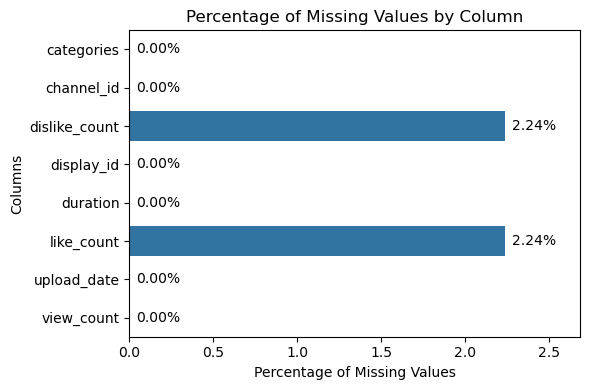

In [41]:
print(f"The shape of video_meta is {video_meta.shape}")
missing_values_video_meta = video_meta.apply(lambda x: x.isna().sum(axis=0) / video_meta.shape[0] * 100)
print(missing_values_video_meta)

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=missing_values_video_meta.values, y=missing_values_video_meta.index, orient='h')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.title('Percentage of Missing Values by Column')
# Add percentage labels to the end of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', padding=5)
plt.xlim(0, max(missing_values_video_meta.values) * 1.2)
plt.tight_layout()
plt.show()

## 2.2. Summary statistics

Here, we create a more visual summary statistics of the datasets


In [42]:
plt.style.use("seaborn-v0_8")
sns.set_theme(style="ticks")
sns.set_palette("husl")

/var/folders/gf/8cnwpg2j29q1w3066zf2yv500000gn/T/ipykernel_16354/3425297261.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_sizes.index, y=dataset_sizes.values, palette="viridis")


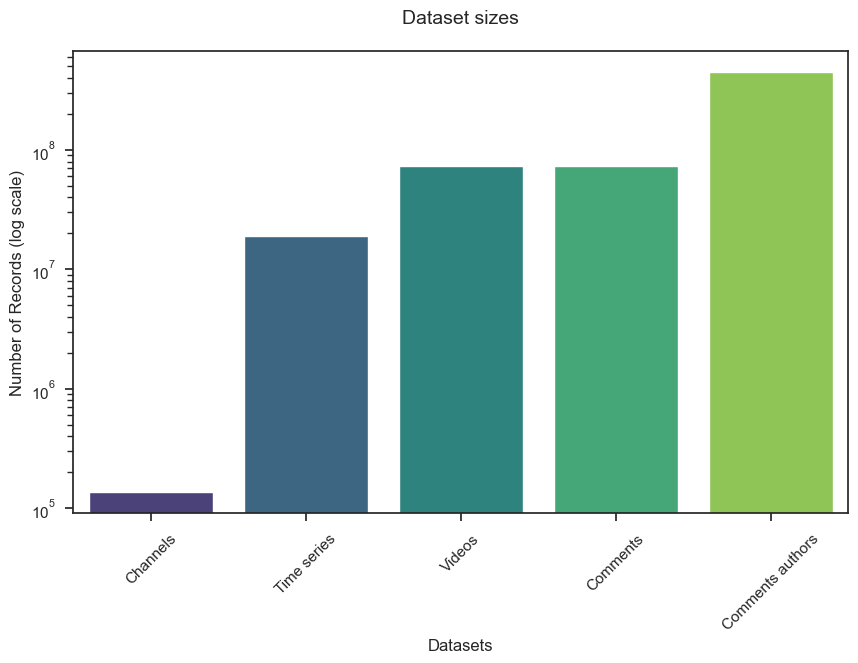

In [43]:
#  Dataset overview
plt.figure(figsize=(10, 6))
dataset_sizes = pd.Series({
    "Channels": len(df_channels_en),
    "Time series": len(df_timeseries_en),
    "Videos": len(video_meta),
    "Comments": len(num_comments),
    "Comments authors": len(num_comments_authors)
})
sns.barplot(x=dataset_sizes.index, y=dataset_sizes.values, palette="viridis")
plt.title("Dataset sizes", fontsize=14, pad=20)
plt.xticks(rotation=45)
plt.yscale("log")
plt.ylabel("Number of Records (log scale)", fontsize=12)
plt.xlabel("Datasets", fontsize=12)

plt.show()

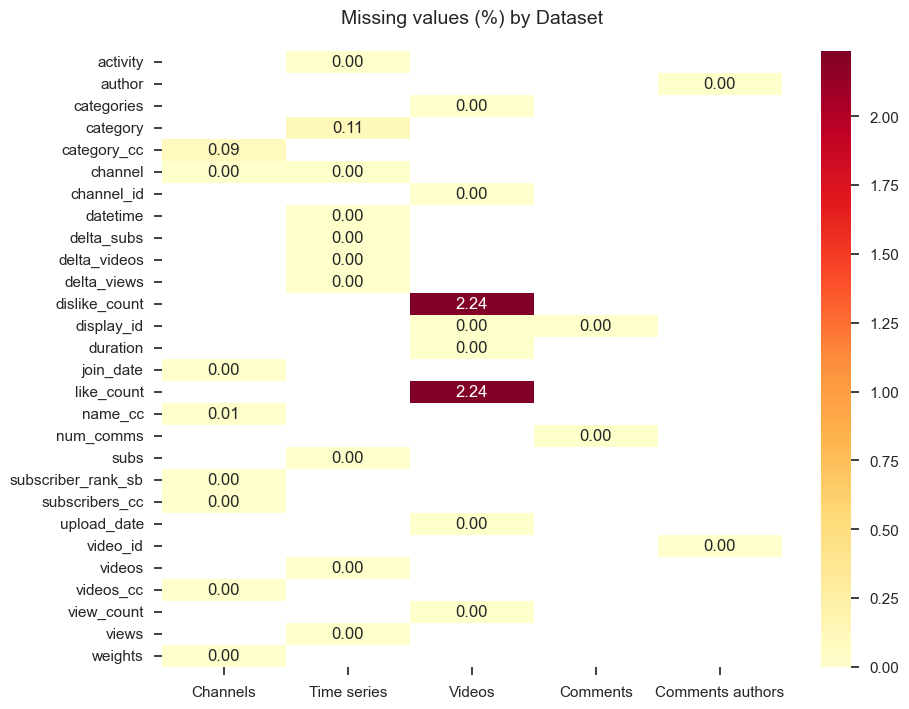

In [44]:
# Missing data
plt.figure(figsize=(10, 8))
missing_data = pd.DataFrame({
    "Channels": df_channels_en.isna().sum() / len(df_channels_en) * 100,
    "Time series": df_timeseries_en.isna().sum() / len(df_timeseries_en) * 100,
    "Videos": video_meta.isna().sum() / len(video_meta) * 100,
    "Comments": num_comments.isna().sum() / len(num_comments) * 100,
    "Comments authors": num_comments_authors.isna().sum() / len(num_comments_authors) * 100
})
sns.heatmap(missing_data, annot=True, fmt=".2f", cmap="YlOrRd")
plt.title("Missing values (%) by Dataset", fontsize=14, pad=20)
plt.show()

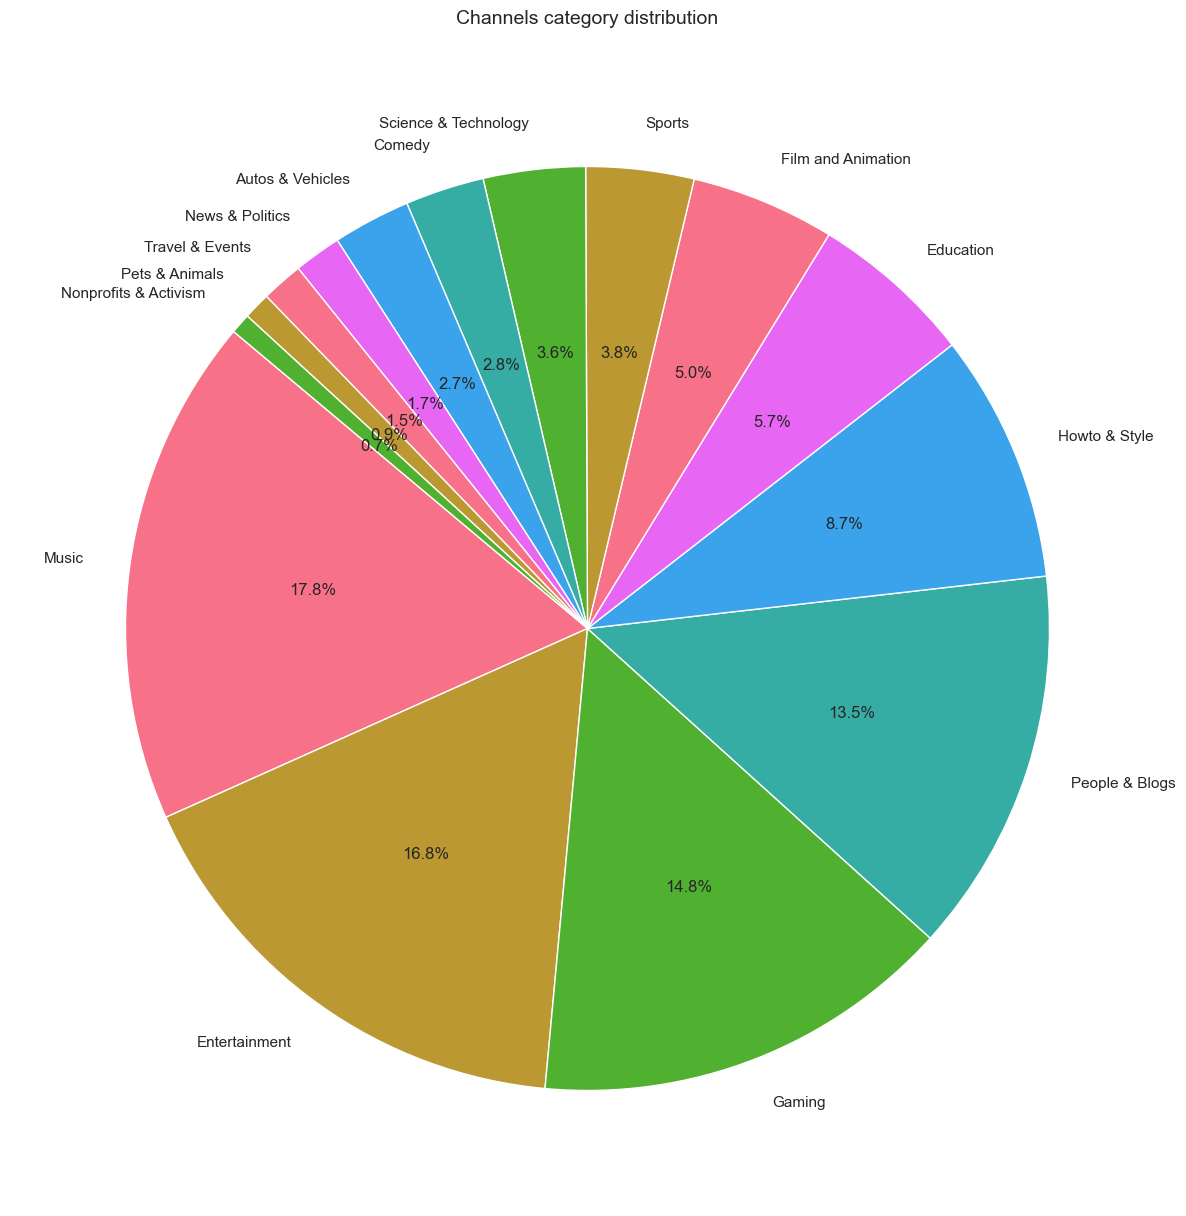

In [45]:
# Category distribution
plt.figure(figsize=(20, 15))
category_counts = df_channels_en["category_cc"].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Channels category distribution", fontsize=14, pad=20)
plt.show()


As we can see, the categories distribution is unbalanced:

- Music (17.8%) and Entertainment (16.8%) are the largest categories, which suggests that YouTube remains heavily focused on these two types of content. This is consistent with YouTube’s broad audience appeal, as music videos and general entertainment have long been some of the most consumed content on the platform.

- Gaming (14.8%) is another major category, indicating the growth and popularity of gaming content on YouTube. Gaming channels have evolved significantly with live streaming, Let’s Plays, and reviews, making it a primary content type and supporting the professionalization of gaming creators.

- Categories like Nonprofits & Activism, Pets & Animals, and Autos & Vehicles have a very small representation (below 2%), indicating that these are either less popular content types on YouTube or more specialized.

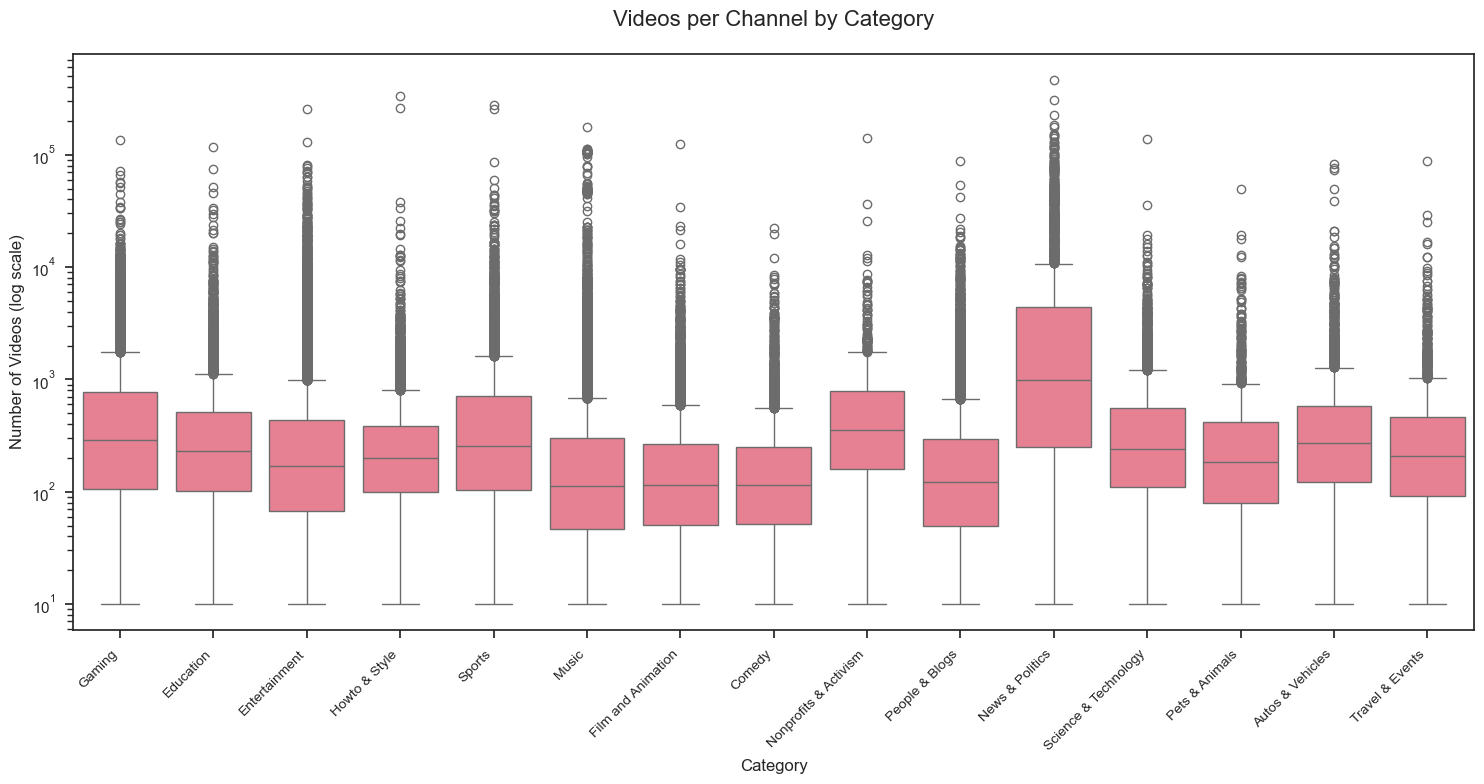

In [46]:
# Videos per Category
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_channels_en, y='videos_cc', x='category_cc')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Videos per Channel by Category', fontsize=16, pad=20)
plt.yscale("log")
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Videos (log scale)', fontsize=12)
plt.tight_layout()
plt.show()

The number of videos per channel shows substantial variability within categories, as indicated by the wide interquartile ranges and the presence of numerous outliers above the top whisker.

Some categories, like Gaming and News & Politics, have a larger spread of video counts, suggesting that certain channels in these categories produce a high volume of content compared to the median.

News & Politics, Science & Technology, and Nonprofits & Activism have relatively higher median video counts per channel compared to categories like Entertainment and How-to & Style. Channels in these categories may rely more on frequent updates or episodic content to keep audiences engaged, which aligns with the nature of these categories. For example, News channels often update frequently to stay relevant.

In the previous plot, Music, Entertainment, and Gaming were among the most common categories. This aligns with the current plot in that these categories also have high production frequencies, as indicated by many channels with high video counts (outliers). This suggests that creators in popular categories tend to upload more frequently or have a long history of content.

News & Politics and Science & Technology have relatively fewer channels according to the previous distribution plot, but they show higher median video counts per channel in this plot. This indicates that while there are fewer channels in these categories, they tend to produce more content on average.

In [47]:
# Dropping missing values
df_channels_en_cleaned = df_channels_en.dropna()
df_timeseries_en_cleaned = df_timeseries_en.dropna()
num_comments_cleaned = num_comments.dropna()
num_comments_authors_cleaned = num_comments_authors.dropna()
video_meta_cleaned = video_meta.dropna()

In [48]:
print(f"The shape of df_channels_en before cleaning is {df_channels_en.shape}")
print(f"The shape of df_timeseries_en before cleaning is {df_timeseries_en.shape}")
print(f"The shape of num_comments before cleaning is {num_comments.shape}")
print(f"The shape of num_comments_authors before cleaning is {num_comments_authors.shape}")
print(f"The shape of video_meta before cleaning is {video_meta.shape}")

The shape of df_channels_en before cleaning is (136470, 8)
The shape of df_timeseries_en before cleaning is (18872499, 10)
The shape of num_comments before cleaning is (72924794, 2)
The shape of num_comments_authors before cleaning is (448810483, 2)
The shape of video_meta before cleaning is (72924794, 8)


In [49]:
print(f"The shape of df_channels_en after cleaning is {df_channels_en_cleaned.shape}")
print(f"The shape of df_timeseries_en after cleaning is {df_timeseries_en_cleaned.shape}")
print(f"The shape of num_comments after cleaning is {num_comments_cleaned.shape}")
print(f"The shape of num_comments_authors after cleaning is {num_comments_authors_cleaned.shape}")
print(f"The shape of video_meta after cleaning is {video_meta_cleaned.shape}")

The shape of df_channels_en after cleaning is (136331, 8)
The shape of df_timeseries_en after cleaning is (18851915, 10)
The shape of num_comments after cleaning is (72924794, 2)
The shape of num_comments_authors after cleaning is (448810483, 2)
The shape of video_meta after cleaning is (71293336, 8)


## 2.3. Univariate analysis

### 2.3.1. Channel metrics

Text(0.5, 0, 'Subscribers per channel (log scale)')

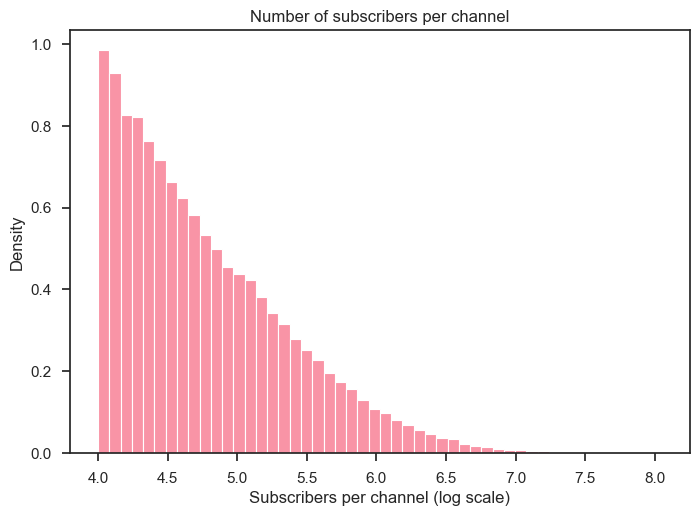

In [50]:
#  Subscriber distribution
num_subs_cc = np.log10(df_channels_en_cleaned["subscribers_cc"])
sns.histplot(num_subs_cc, stat = "density", kde=False, bins = 50,)
plt.title("Number of subscribers per channel")
plt.xlabel("Subscribers per channel (log scale)")

This plot indicates that the distribution of subscribers is heavily right-skewed, with most channels clustered at the lower end of the subscriber scale and fewer channels achieving higher subscriber counts. This indicates that a large majority of channels have relatively low subscriber counts, while only a small number of channels have very high subscriber counts, which is typical of social media platforms where a few popular creators capture a large portion of the audience.

Text(0.5, 0, 'log10(videos per channel)')

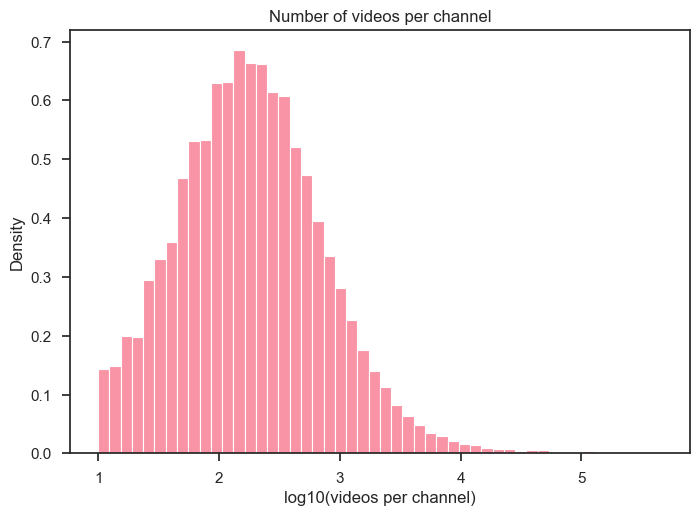

In [51]:
# Video count distribution
num_videos_cc = np.log10(df_channels_en_cleaned["videos_cc"])   
sns.histplot(num_videos_cc, stat = "density", kde=False, bins = 50,)
plt.title("Number of videos per channel")
plt.xlabel("log10(videos per channel)")


The distribution peaks around log10 of 2, which corresponds to about 100 videos per channel. This indicates that most channels in the dataset have produced close to 100 videos.

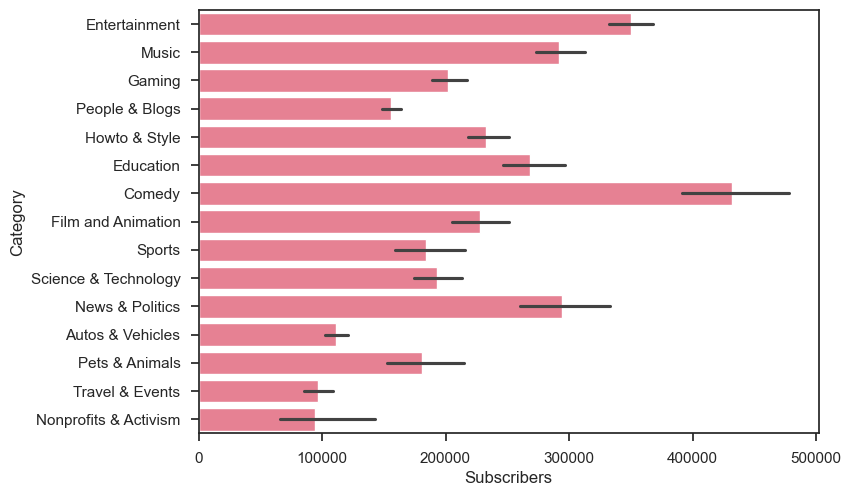

In [52]:
#Category distribution
category_order = df_channels_en_cleaned.groupby("category_cc")["subscribers_cc"].sum().sort_values(ascending=False).index

sns.barplot(data=df_channels_en_cleaned, x="subscribers_cc", y="category_cc", orient="h", order=category_order)
plt.xlabel("Subscribers")
plt.ylabel("Category")
plt.show()

Film and Animation, Entertainment, and Music categories have the highest average subscriber counts, suggesting that these categories attract larger audiences. This aligns with general viewing preferences, as these categories are popular across various demographics and are highly engaging.

Categories with higher average subscribers (like Entertainment, Film & Animation, and Music) might be more lucrative for creators aiming to professionalize their content, as they can potentially attract more subscribers and thus more monetization opportunities.

Categories with lower average subscribers may still hold value for creators who focus on niche content, as even with a smaller audience, they can foster strong community engagement and targeted monetization strategies.

### 2.3.2. Videos metrics

Text(0.5, 0, 'log10(view count + 1)')

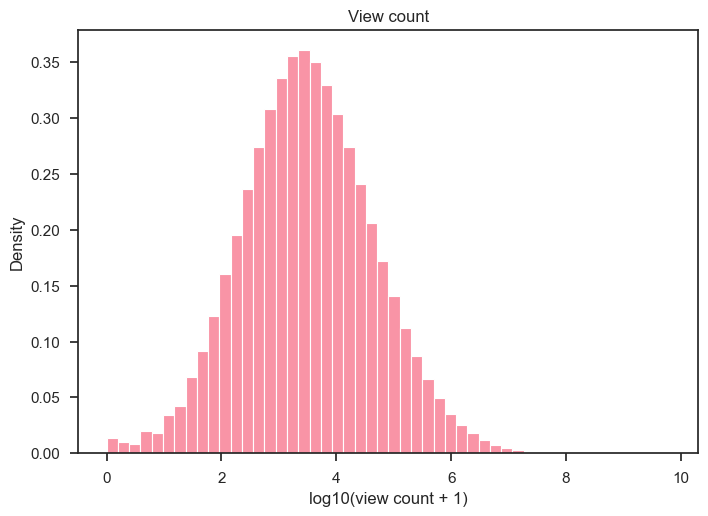

In [53]:
# View count distribution
view_count = np.log10(video_meta_cleaned["view_count"] + 1)
sns.histplot(view_count, stat="density", kde=False, bins = 50,)
plt.title("View count")
plt.xlabel("log10(view count + 1)")

Text(0.5, 0, 'log10(duration)')

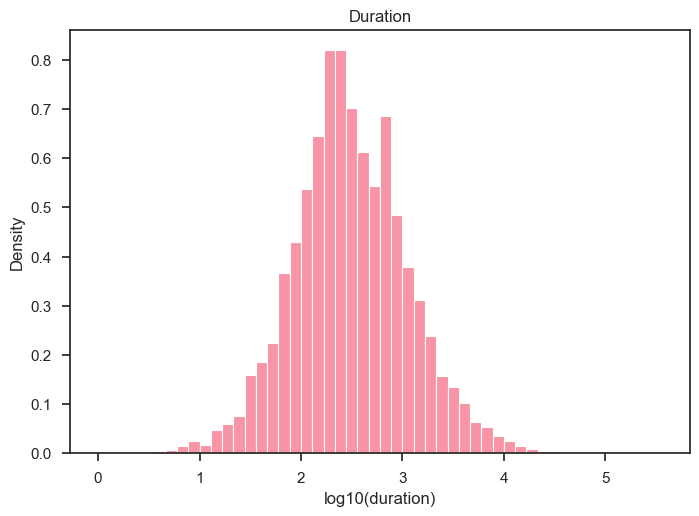

In [54]:
# Duration distribution
duration = np.log10(video_meta_cleaned["duration"])
sns.histplot(duration, stat = "density", kde=False, bins = 50,)
plt.title("Duration")
plt.xlabel("log10(duration)")

Text(0.5, 0, 'log10(like)')

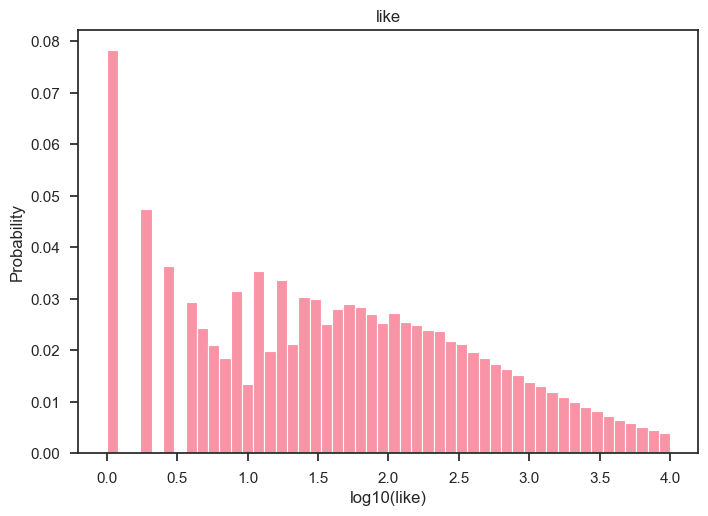

In [55]:
# Like/dislike distribution
like = np.log10(video_meta_cleaned["like_count"] + 1)

sns.histplot(like, stat = "probability", kde=False, bins = 50, binrange = (0, 4))
plt.title("like")
plt.xlabel("log10(like)")

There is a peak at the very left of the distribution (around 0 on the log scale), indicating that a significant number of videos receive a low number of likes. This could correspond to videos that either fail to reach a wide audience or are not particularly engaging. Many videos on YouTube likely receive minimal engagement, especially from smaller or less active channels.

Text(0.5, 0, 'log10(dislike + 1)')

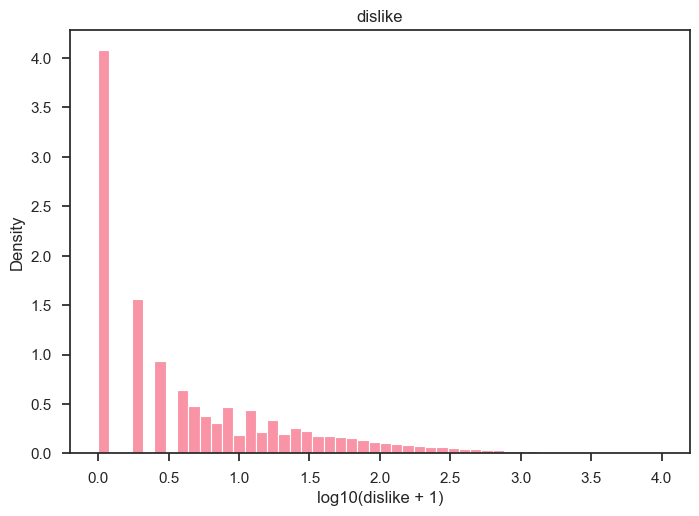

In [56]:
dislike = np.log10(video_meta_cleaned["dislike_count"] + 1)

sns.histplot(dislike, stat = "density", kde=False, bins = 50, binrange = (0, 4))
plt.title("dislike")
plt.xlabel("log10(dislike + 1)")

### 2.3.3. Engagement metrics

Text(0.5, 0, 'log10(comment count per video + 1)')

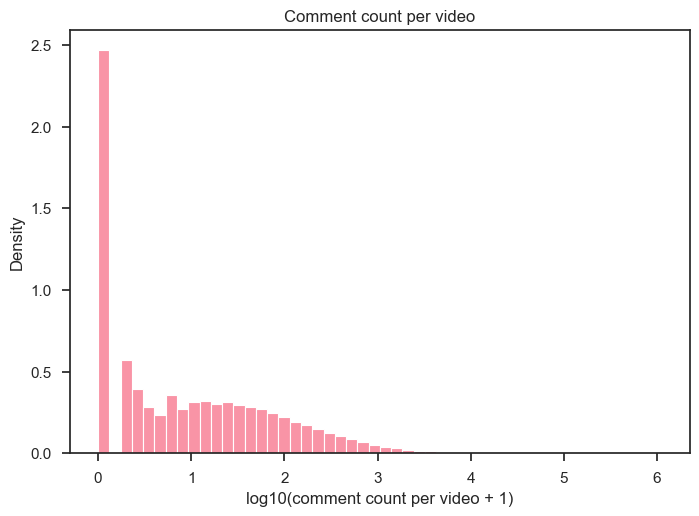

In [57]:
# Comment count per video distribution
comment_count = np.log10(num_comments_cleaned["num_comms"] + 1)
sns.histplot(comment_count, stat = "density", kde=False, bins = 50,)
plt.title("Comment count per video")
plt.xlabel("log10(comment count per video + 1)")


Text(0.5, 0, 'log10(comment count per user + 1)')

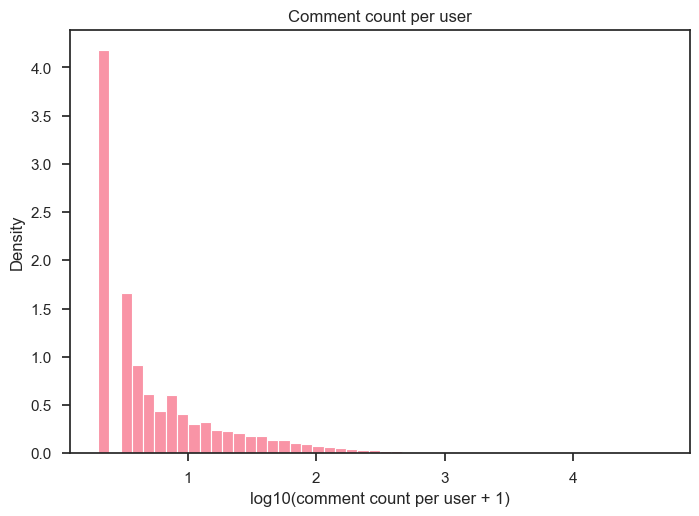

In [58]:
# Comment count per user distribution
comment_count_author = np.log10(num_comments_authors_cleaned["video_id"].head( 1000000) + 1)
sns.histplot(comment_count_author, stat = "density", kde=False, bins = 50,)
plt.title("Comment count per user")
plt.xlabel("log10(comment count per user + 1)")

### 2.3.4. Temporal metrics

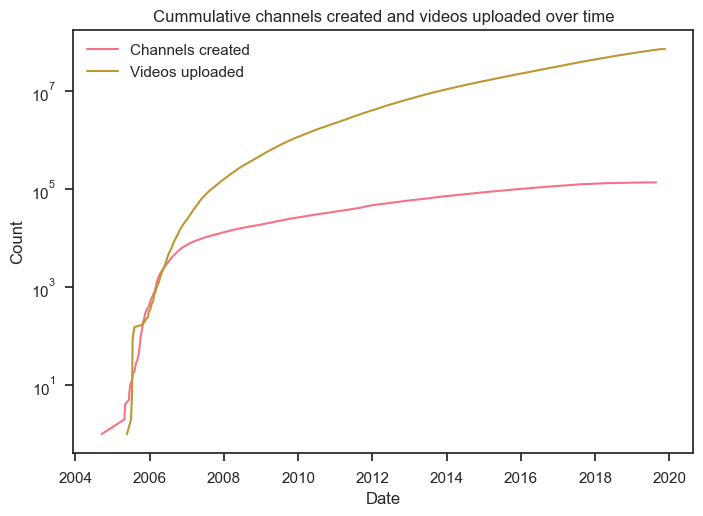

In [59]:
# Cummulative channels created and uploaded over time
videos_created_cumul = df_channels_en_cleaned.groupby("join_date")["videos_cc"].count()
videos_uploaded_cumul = video_meta_cleaned.groupby("upload_date")["channel_id"].count()
plt.plot(videos_created_cumul.cumsum(), label = "Channels created")
plt.plot(videos_uploaded_cumul.cumsum(), label = "Videos uploaded")
plt.title("Cummulative channels created and videos uploaded over time")
plt.yscale("log")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.show()

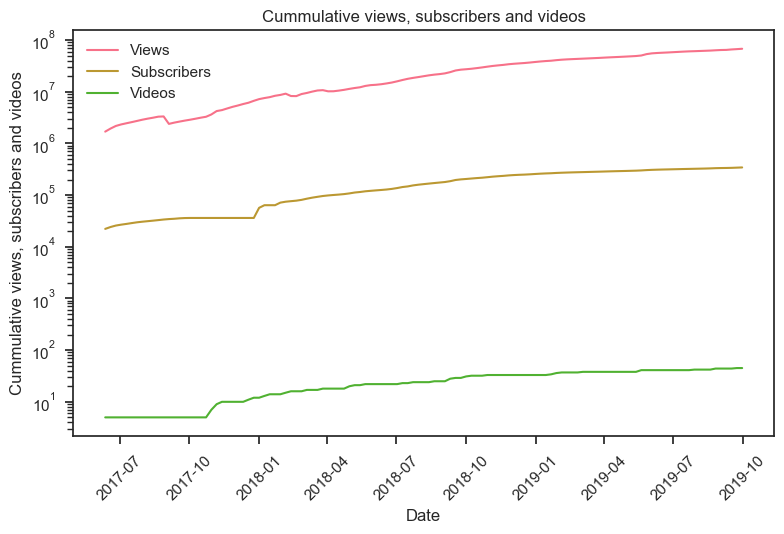

In [60]:
# Cummulative views distribution
# We plot the cummulative views, subscribers and videos for a random channel
np.random.seed(12) 
s = df_timeseries_en_cleaned.sample(1).channel.values[0]                        
vals = df_timeseries_en_cleaned.loc[df_timeseries_en_cleaned.channel == s]    
plt.plot(vals.datetime, vals.views, label = "Views")
plt.plot(vals.datetime, vals.subs, label = "Subscribers")
plt.plot(vals.datetime, vals.videos, label = "Videos")
plt.legend()
plt.title("Cummulative views, subscribers and videos")
plt.xlabel("Date")
plt.ylabel("Cummulative views, subscribers and videos")
plt.yscale("log")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



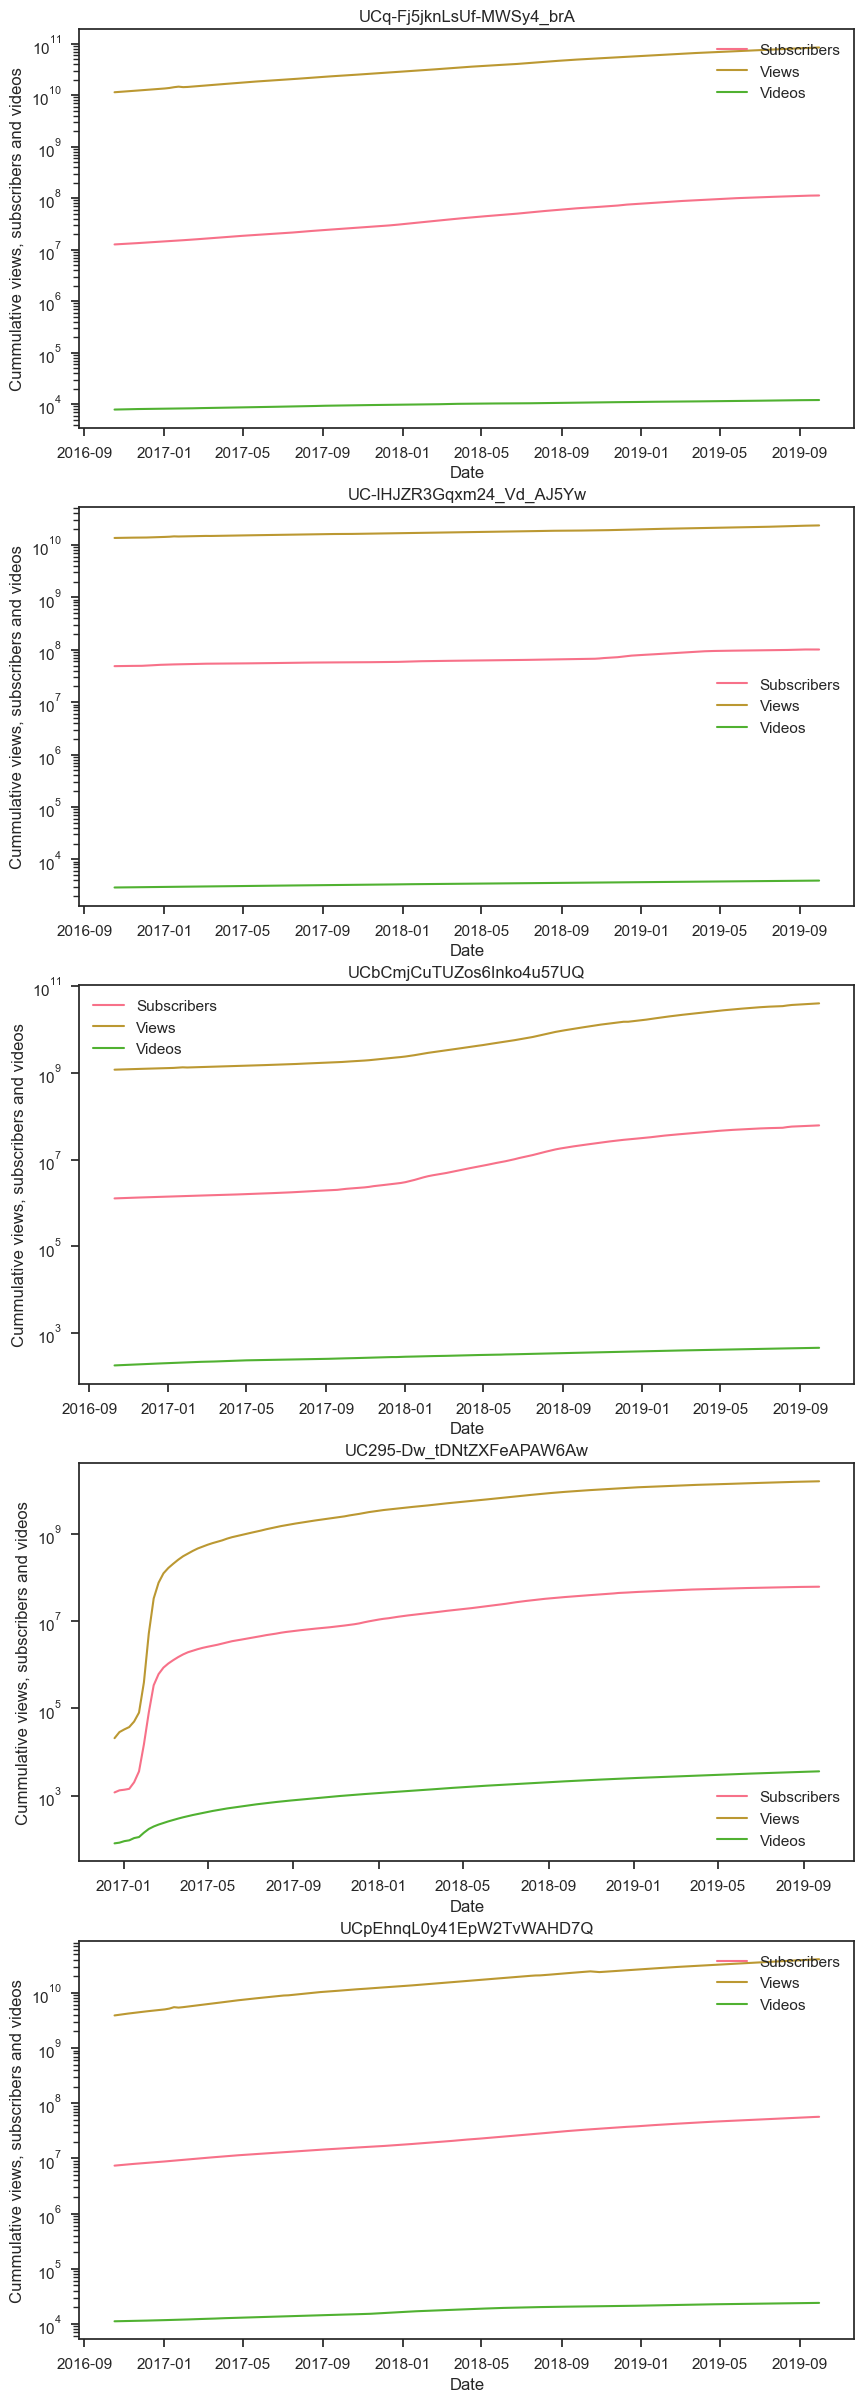

In [61]:
# We can also visualize the same metrics (subscribers, views, videos) for the top 5 channels
top_5_channels = df_timeseries_en_cleaned.groupby("channel").agg({"subs": "max", "views": "max", "videos": "max"}).sort_values(by = "subs", ascending = False).head(5)
fig, axs = plt.subplots(5, 1, figsize=(10, 30))

for i, channel in enumerate(top_5_channels.index):
    vals = df_timeseries_en_cleaned.loc[df_timeseries_en_cleaned.channel == channel]
    axs[i].plot(vals.datetime, vals.subs, label = "Subscribers")
    axs[i].plot(vals.datetime, vals.views, label = "Views")
    axs[i].plot(vals.datetime, vals.videos, label = "Videos")
    axs[i].legend()
    axs[i].set_title(f"{channel}")
    axs[i].set_xlabel("Date")
    axs[i].set_ylabel("Cummulative views, subscribers and videos")
    axs[i].set_yscale("log")
plt.show()


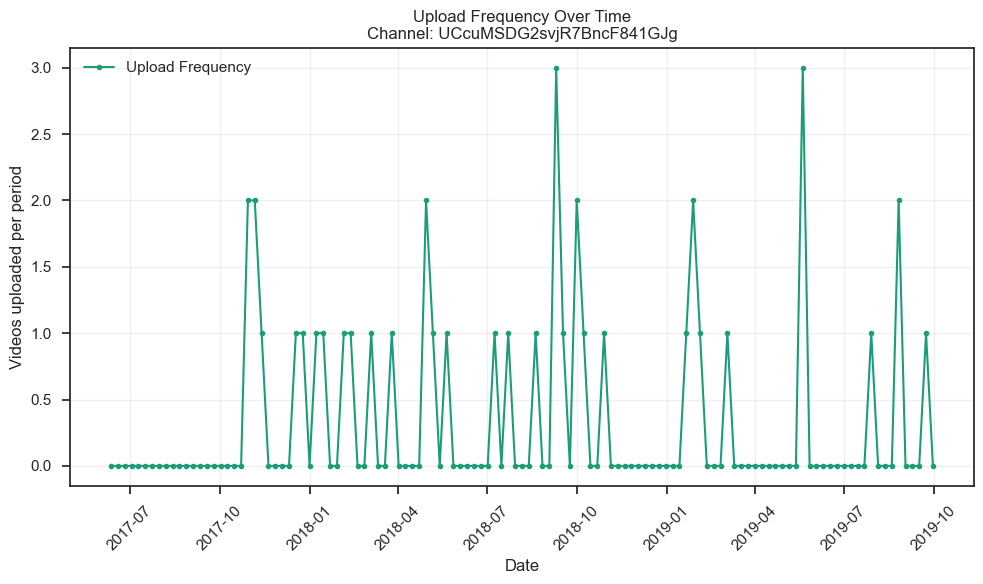

In [62]:
# upload frequency per period for a random channel : for this plot we use the delta_videos column as this is not cumulative
# This plot tells us if there is consistency in the upload frequency of a channel
np.random.seed(12)
# Select random channel 
random_channel = df_timeseries_en_cleaned.sample(1).channel.values[0]
vals = df_timeseries_en_cleaned.loc[df_timeseries_en_cleaned.channel == random_channel]

plt.figure(figsize=(10, 6))
plt.plot(vals.datetime, vals.delta_videos, label='Upload Frequency', marker='o', markersize=4, color='#1b9e77')

plt.title(f"Upload Frequency Over Time\nChannel: {random_channel}")
plt.xlabel("Date")
plt.ylabel("Videos uploaded per period")
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()


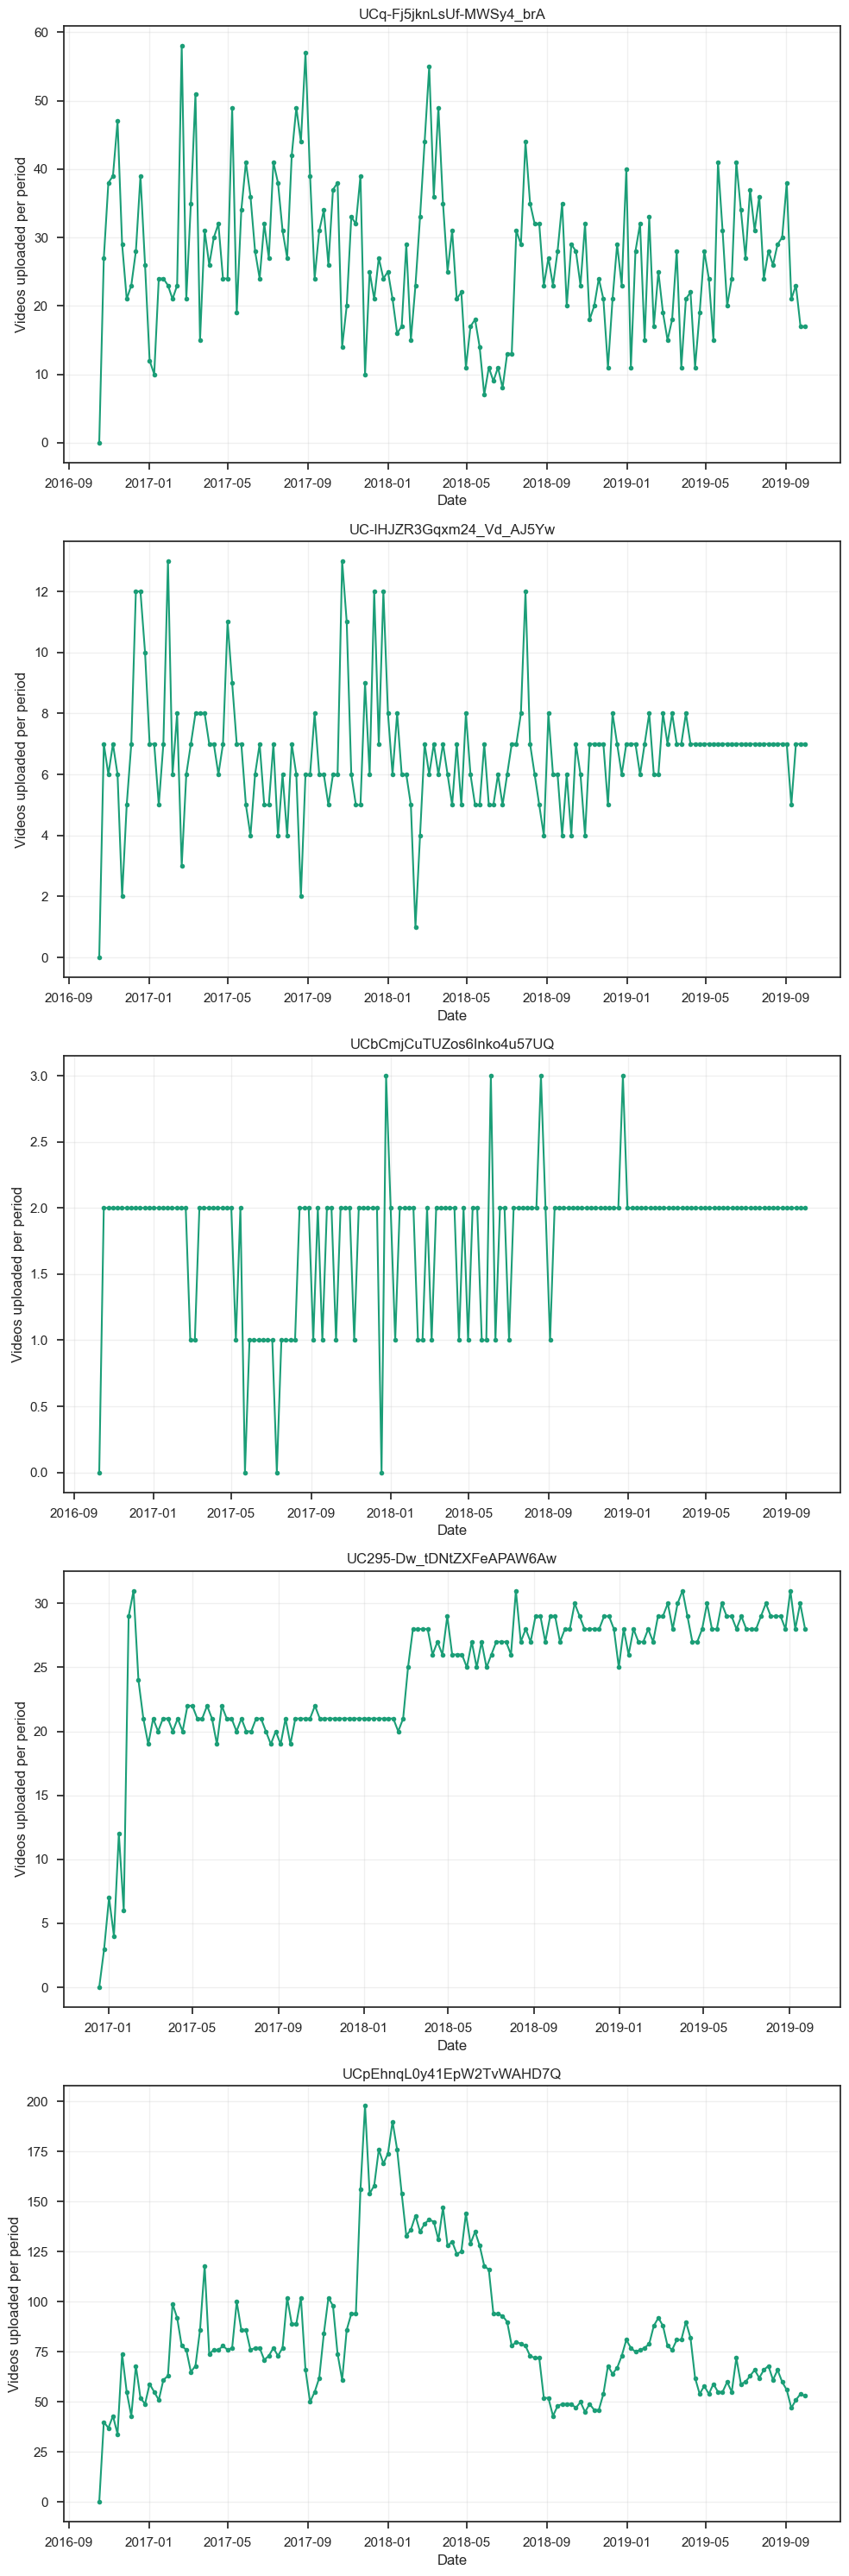

In [63]:
# We plot the same plot for the top channels
top_5_channels = df_timeseries_en_cleaned.groupby("channel").agg({"subs": "max", "views": "max", "videos": "max"}).sort_values(by = "subs", ascending = False).head(5)
fig, axs = plt.subplots(5, 1, figsize=(10, 30))

for i, channel in enumerate(top_5_channels.index):
    vals = df_timeseries_en_cleaned.loc[df_timeseries_en_cleaned.channel == channel]
    axs[i].plot(vals.datetime, vals.delta_videos, label='Upload Frequency', marker='o', markersize=4, color='#1b9e77')
    axs[i].set_title(f"{channel}")
    axs[i].set_xlabel("Date")
    axs[i].set_ylabel("Videos uploaded per period")
    axs[i].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 2.4. Multivariate analysis

In [64]:
df_timeseries_en_cleaned.head()

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03,2.024946e+05,0.000000,650.222222,0.000000,5,0,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10,3.940857e+05,191591.111111,1046.000000,395.777778,6,1,1
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17,8.353938e+05,441308.083333,1501.500000,455.500000,6,0,1
3,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-24,1.104577e+06,269183.250000,1750.000000,248.500000,6,0,0
4,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-31,1.284406e+06,179828.600000,2008.300000,258.300000,6,0,0


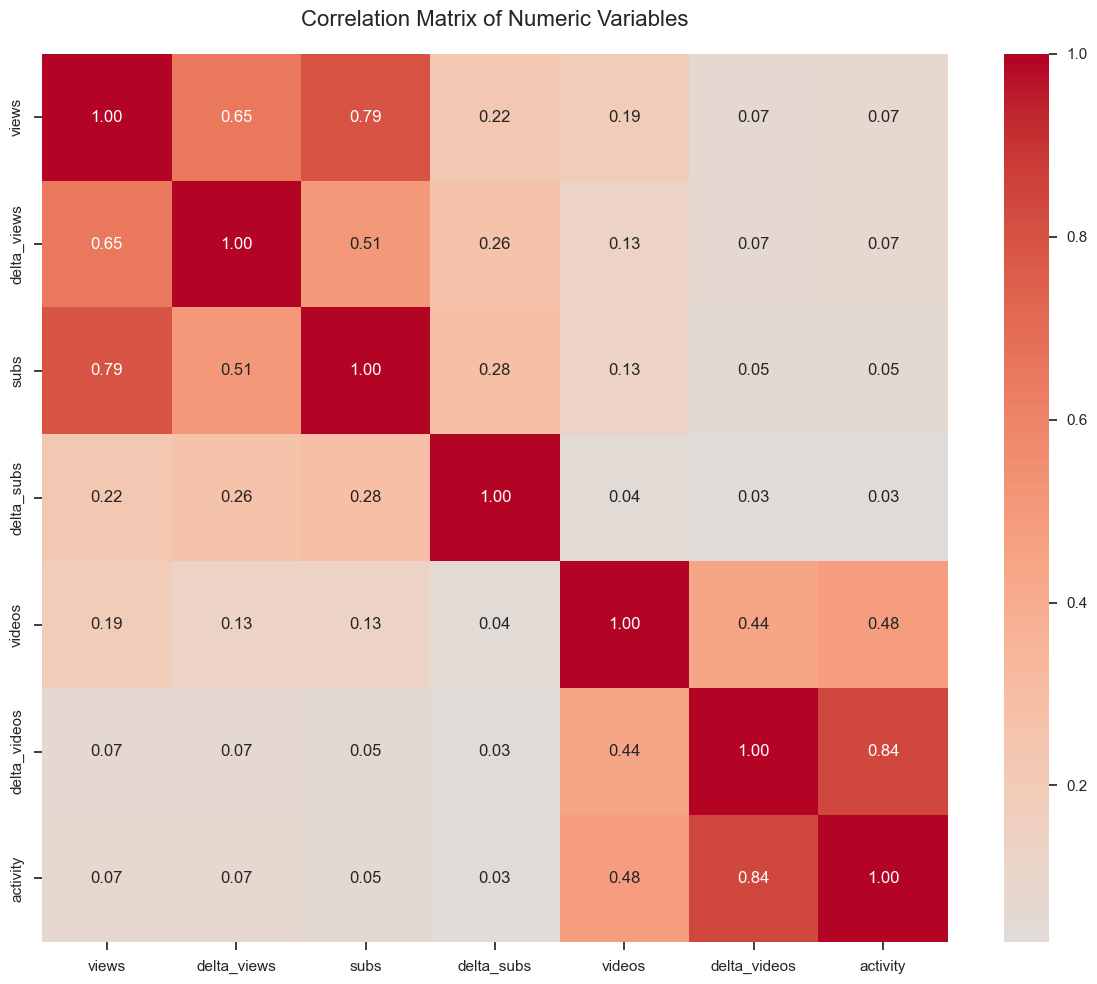

In [65]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
# Select numeric columns
numeric_cols = df_timeseries_en.select_dtypes(include=[np.number]).columns
correlation_matrix = df_timeseries_en[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Variables', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

There is a strong positive correlation (0.79) between views and subscribers, indicating that channels with more subscribers tend to also have higher views. This is expected, as larger audiences usually lead to more video views.

A moderate correlation (0.65) exists between views and delta_views (the change in views), suggesting that channels with higher total views often continue to gain views over time. This may reflect that popular channels retain consistent audience engagement.

There is a notable correlation (0.44) between videos and delta_videos, meaning that channels with a higher cumulative video count are likely to continue uploading videos frequently.

/usr/local/Caskroom/miniconda/base/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


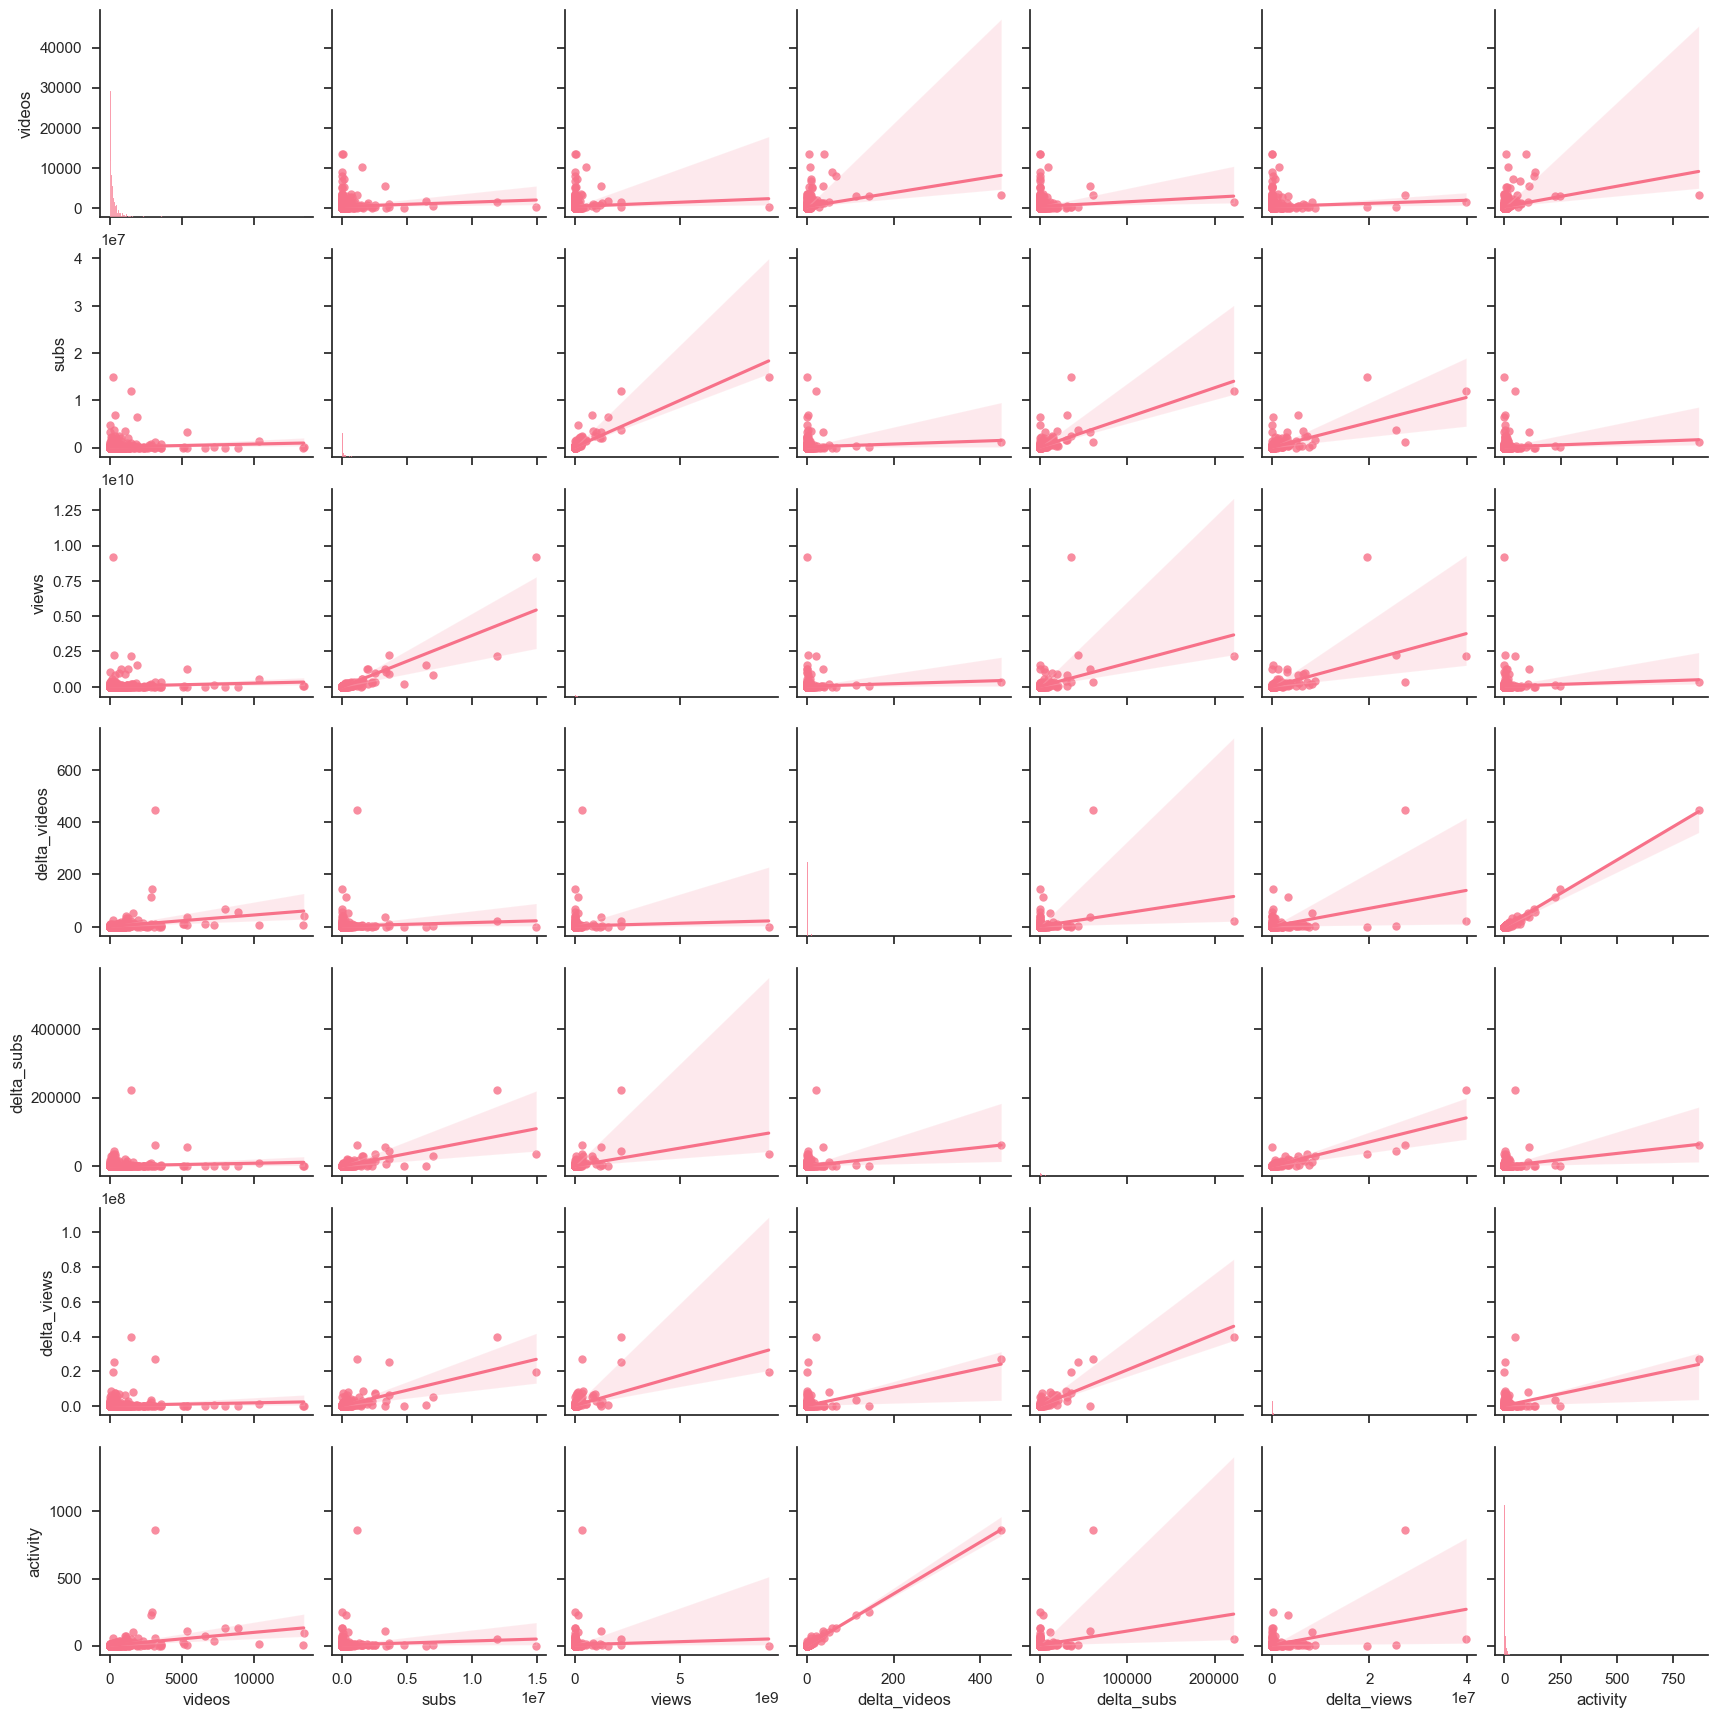

In [66]:
# Correlation between the variables and add spearman correlation coefficient
sns.pairplot(df_timeseries_en_cleaned.sample(1000), vars = ["videos", "subs", "views", "delta_videos", "delta_subs", "delta_views", "activity"], kind='reg', )
plt.show()

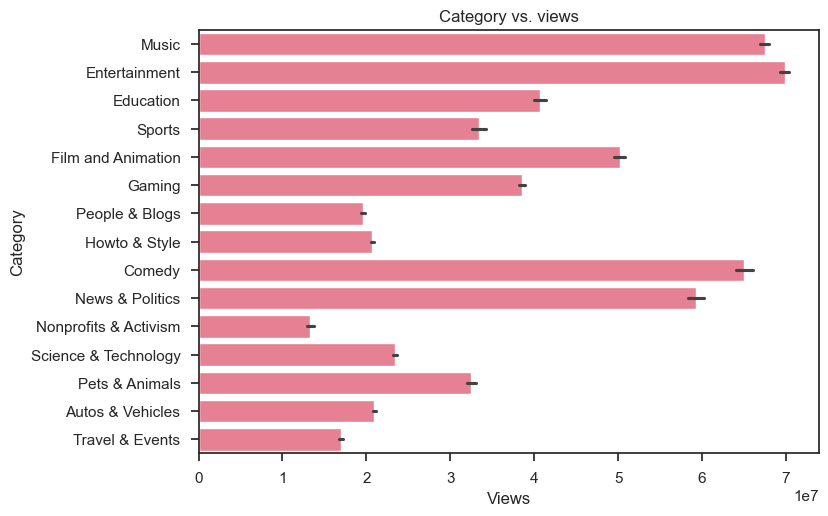

In [67]:
# Category vs. views : Do certain categories have more views?
df_timeseries_en_cleaned_sorted = df_timeseries_en_cleaned.sort_values('views', ascending=False)
sns.barplot(x = "views", y = "category", data = df_timeseries_en_cleaned_sorted)
plt.title("Category vs. views")
plt.xlabel("Views")
plt.ylabel("Category")
plt.show()

Entertainment, Music, and Comedy are the top three categories in terms of average views, suggesting that these categories have broad appeal and attract large audiences. Channels in these categories likely produce content with high engagement potential, such as music videos, viral challenges, and popular entertainment content.

Gaming, Film and Animation, and Education have moderate average views. These categories appeal to more niche but dedicated audiences.

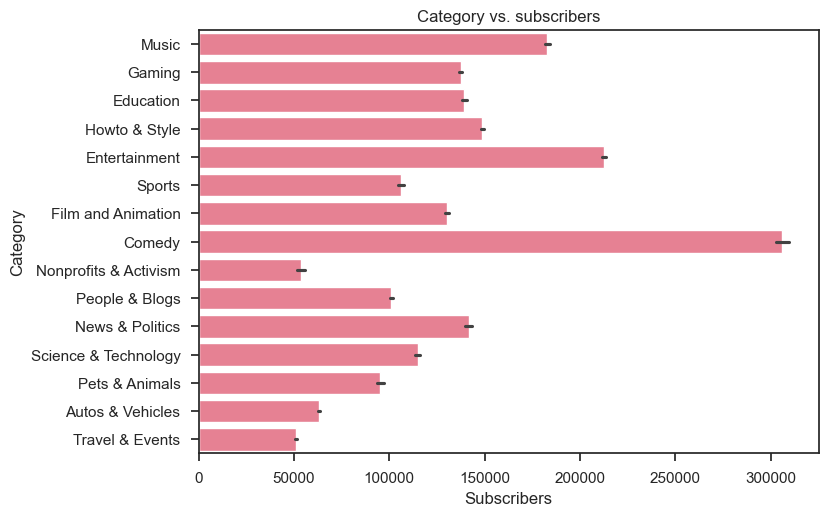

In [68]:
# Category vs. subscribers
df_timeseries_en_cleaned_sorted = df_timeseries_en_cleaned.sort_values('subs', ascending=False)
sns.barplot(x = "subs", y = "category", data = df_timeseries_en_cleaned_sorted)
plt.title("Category vs. subscribers")
plt.xlabel("Subscribers")
plt.ylabel("Category")
plt.show()

Comedy and Music categories stand out with the highest average subscriber counts. Channels in these categories may have strong subscriber retention due to the regular production of engaging content, which can lead to a steady accumulation of subscribers over time.

We can see that there is some correlation between the number of subscribers and the views in a category:

- Comedy and Music categories both show high average views and high average subscribers.
- Entertainment and Film and Animation categories have high average views but relatively moderate subscriber counts.

In [69]:
# We merge channel and time series data and video metadata
merged_data = df_timeseries_en_cleaned.merge(df_channels_en_cleaned, on="channel", how="left")
merged_data.head()

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity,category_cc,join_date,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03,2.024946e+05,0.000000,650.222222,0.000000,5,0,3,Film and Animation,2017-05-21,MagnusNation,65100.0,28.0,231223.0,6.336
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10,3.940857e+05,191591.111111,1046.000000,395.777778,6,1,1,Film and Animation,2017-05-21,MagnusNation,65100.0,28.0,231223.0,6.336
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17,8.353938e+05,441308.083333,1501.500000,455.500000,6,0,1,Film and Animation,2017-05-21,MagnusNation,65100.0,28.0,231223.0,6.336
3,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-24,1.104577e+06,269183.250000,1750.000000,248.500000,6,0,0,Film and Animation,2017-05-21,MagnusNation,65100.0,28.0,231223.0,6.336
4,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-31,1.284406e+06,179828.600000,2008.300000,258.300000,6,0,0,Film and Animation,2017-05-21,MagnusNation,65100.0,28.0,231223.0,6.336


## 2.5. Temporal analysis

### 2.5.1. Growth Analysis

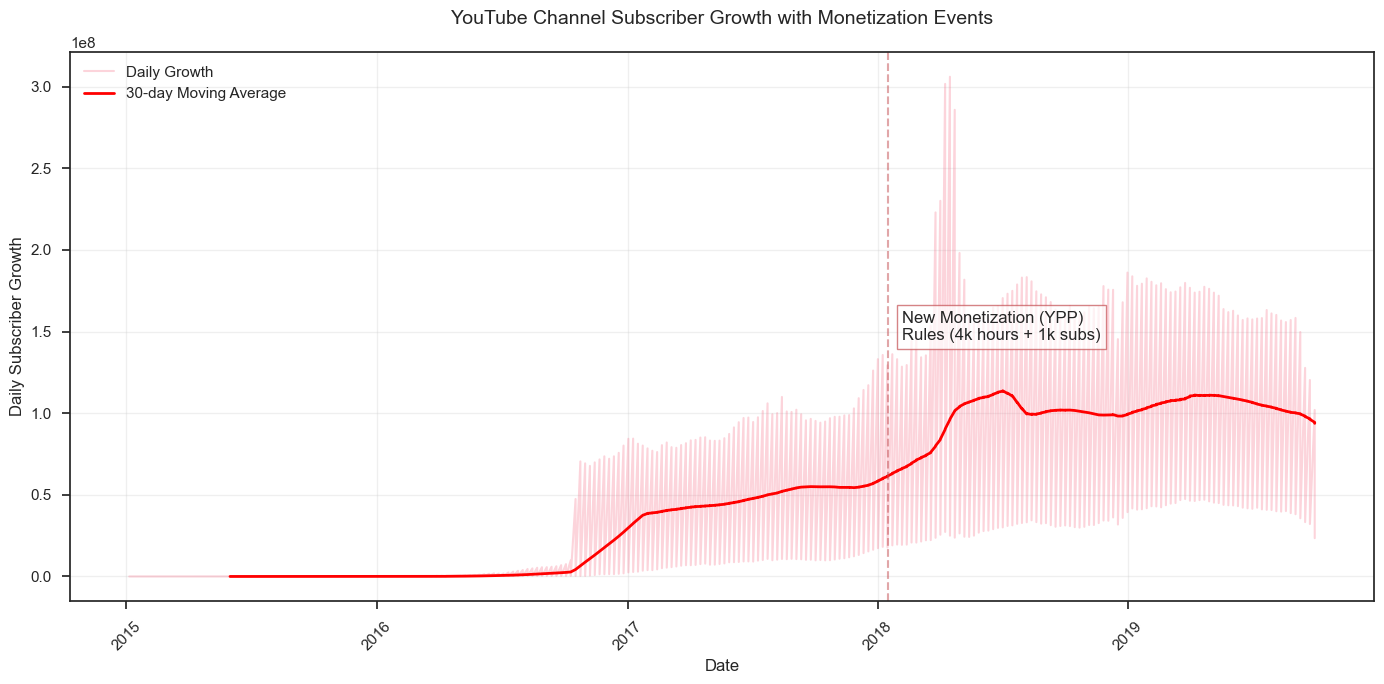

In [70]:
# Subscriber growth trends
subscriber_growth = df_timeseries_en_cleaned.groupby("datetime")["delta_subs"].sum()

plt.figure(figsize=(14, 7))
sns.lineplot(x=pd.to_datetime(subscriber_growth.index), y=subscriber_growth.values, alpha=0.3, label='Daily Growth')

# Take the rolling mean of the subscriber growth to smooth the curve
rolling_mean = subscriber_growth.rolling(window=30).mean()
sns.lineplot(x=pd.to_datetime(subscriber_growth.index),y=rolling_mean.values,color='red',linewidth=2,label='30-day Moving Average')

# Important YouTube monetization dates
monetization_events = {
    '2018-01-16': 'New Monetization (YPP)\nRules (4k hours + 1k subs)',
}

colors = ['r']
for i, (date, event) in enumerate(monetization_events.items()):
    event_date = pd.to_datetime(date)
    plt.axvline(x=event_date, color=colors[i], linestyle='--', alpha=0.5)
    
    date_idx = pd.to_datetime(subscriber_growth.index)
    nearby_max = subscriber_growth[(date_idx > event_date - pd.Timedelta(days=30)) & 
    (date_idx < event_date + pd.Timedelta(days=30))].max() if event_date <= subscriber_growth.index.max() else subscriber_growth.max()
    
    plt.annotate(event, xy=(event_date, nearby_max), xytext=(10, 10), textcoords='offset points', bbox=dict(facecolor='white', edgecolor=colors[i], alpha=0.7), rotation=0)

plt.title("YouTube Channel Subscriber Growth with Monetization Events", pad=20, fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Daily Subscriber Growth", fontsize=12)

plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.grid(True, alpha=0.3)
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

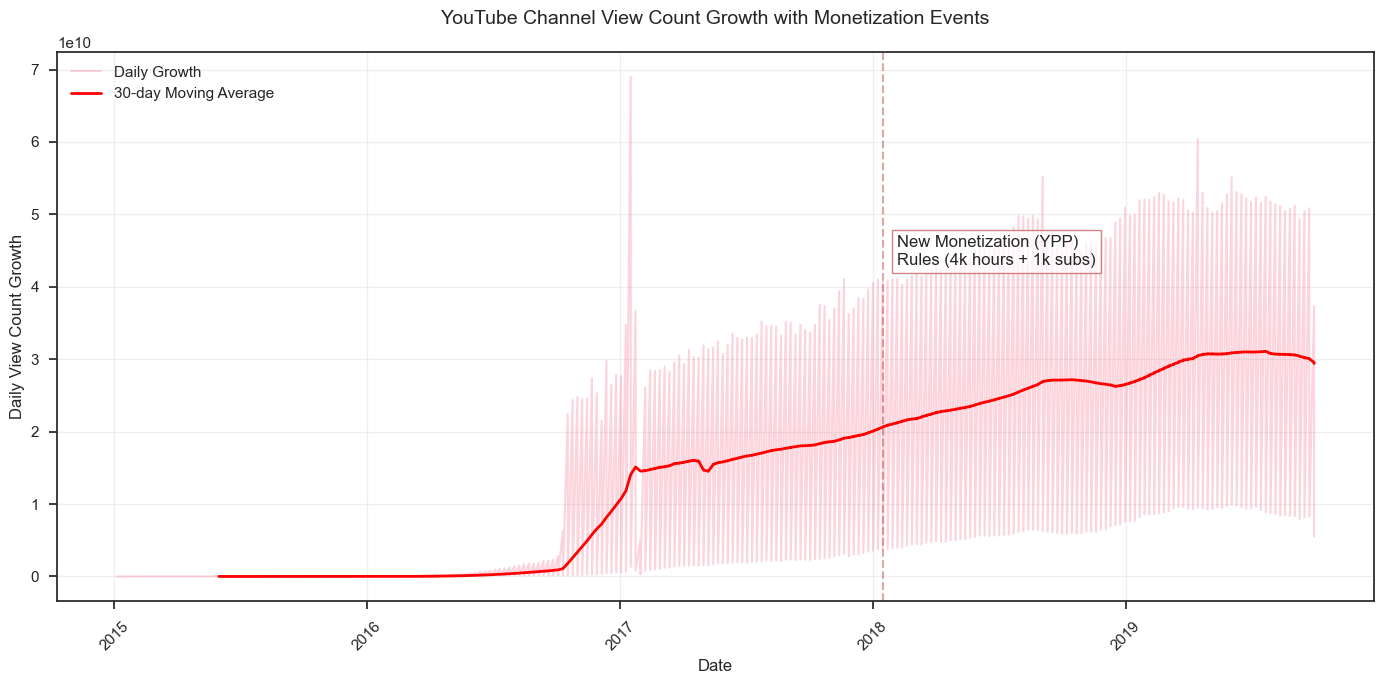

In [71]:
# View accumulation patterns
view_count_growth = df_timeseries_en_cleaned.groupby("datetime")["delta_views"].sum()

plt.figure(figsize=(14, 7))
sns.lineplot(x=pd.to_datetime(view_count_growth.index), y=view_count_growth.values, alpha=0.3, label='Daily Growth')
# Take the rolling mean of the view count growth to smooth the curve
rolling_mean = view_count_growth.rolling(window=30).mean()
sns.lineplot(x=pd.to_datetime(view_count_growth.index),y=rolling_mean.values,color='red',linewidth=2,label='30-day Moving Average')

# Important YouTube monetization dates
monetization_events = {
    '2018-01-16': 'New Monetization (YPP)\nRules (4k hours + 1k subs)',
}

colors = ['r']
for i, (date, event) in enumerate(monetization_events.items()):
    event_date = pd.to_datetime(date)
    plt.axvline(x=event_date, color=colors[i], linestyle='--', alpha=0.5)
    
    date_idx = pd.to_datetime(view_count_growth.index)
    nearby_max = view_count_growth[(date_idx > event_date - pd.Timedelta(days=30)) & 
    (date_idx < event_date + pd.Timedelta(days=30))].max() if event_date <= subscriber_growth.index.max() else subscriber_growth.max()
    
    plt.annotate(event, xy=(event_date, nearby_max), xytext=(10, 10), textcoords='offset points', bbox=dict(facecolor='white', edgecolor=colors[i], alpha=0.7), rotation=0)

plt.title("YouTube Channel View Count Growth with Monetization Events", pad=20, fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Daily View Count Growth", fontsize=12)

plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.grid(True, alpha=0.3)
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

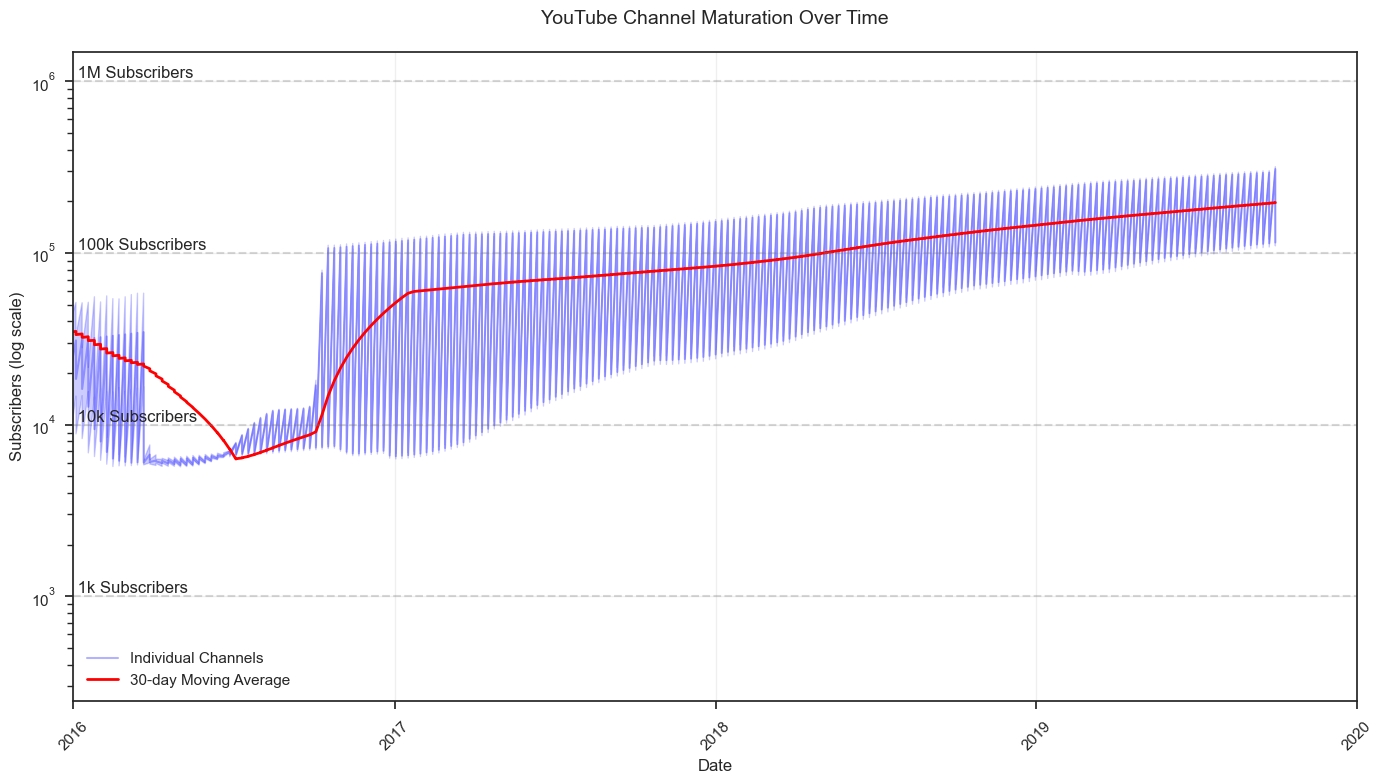

In [72]:
# Channel maturation patterns over time
channel_maturation = df_timeseries_en_cleaned.groupby(["channel", "datetime"])["subs"].max()

plt.figure(figsize=(14, 8))
sns.lineplot(x=pd.to_datetime(channel_maturation.index.get_level_values(1)), y=channel_maturation.values, alpha=0.3, color='blue', label='Individual Channels')

# Take the rolling mean of the subscriber growth to smooth the curve
daily_avg = channel_maturation.groupby(level=1).mean()
rolling_mean = daily_avg.rolling(window=30).mean()
sns.lineplot(x=pd.to_datetime(daily_avg.index), y=rolling_mean.values, color='red', linewidth=2, label='30-day Moving Average')
# Add milestone annotations
milestones = {
    '1k Subscribers': 1000,
    '10k Subscribers': 10000,
    '100k Subscribers': 100000,
    '1M Subscribers': 1000000
}

for milestone, value in milestones.items():
    plt.axhline(y=value, color='gray', linestyle='--', alpha=0.3)
    plt.text(pd.Timestamp('2016-01-01'), value, f' {milestone}', verticalalignment='bottom')

plt.title("YouTube Channel Maturation Over Time", pad=20, fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2020-01-01'))
plt.ylabel("Subscribers (log scale)", fontsize=12)
plt.yscale('log') 

plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.grid(True, alpha=0.3)
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

### 2.5.2. Activity Patterns

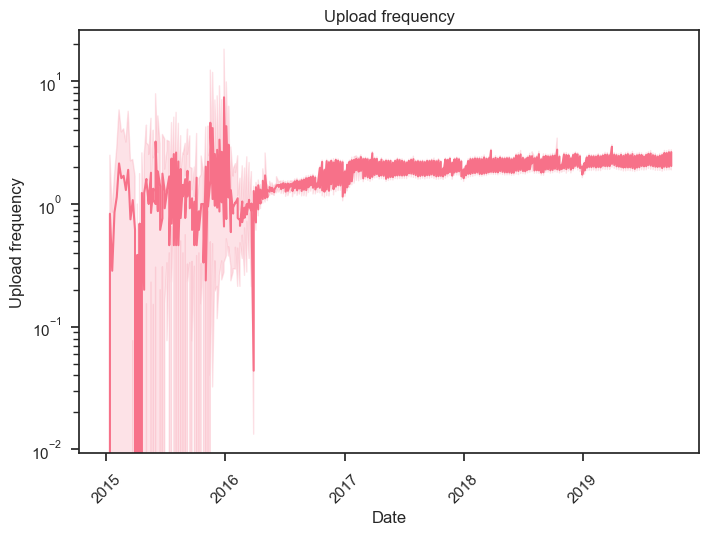

In [73]:
# Upload frequency over time
upload_freq = df_timeseries_en_cleaned.groupby(["channel", "datetime"])["delta_videos"].sum()
sns.lineplot(x = pd.to_datetime(upload_freq.index.get_level_values(1)), y = upload_freq.values)
plt.title("Upload frequency")
plt.yscale("log")
plt.xlabel("Date")
plt.ylabel("Upload frequency")
plt.xticks(rotation=45)
plt.show()

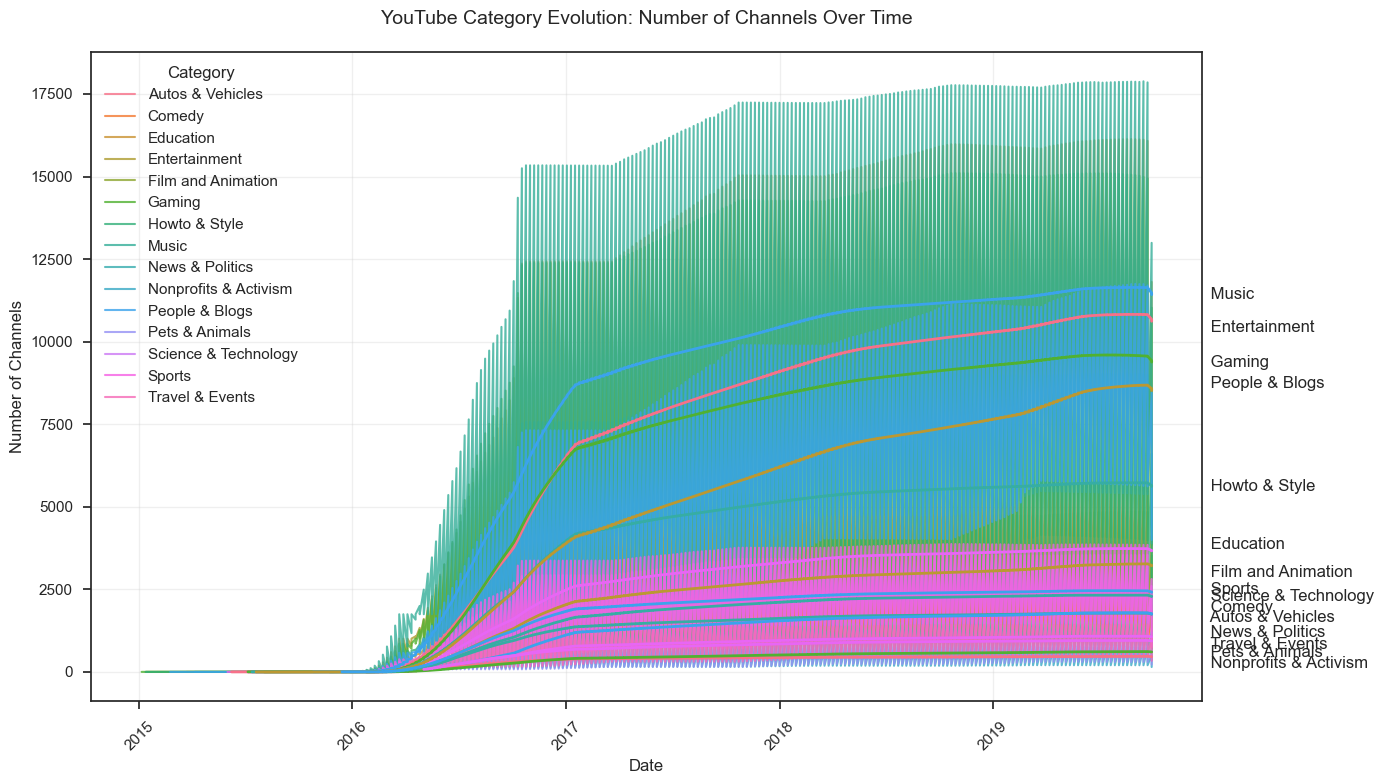

In [74]:
# Category evolution (number of channels per category over time)
plt.figure(figsize=(14, 8))
category_evolution = df_timeseries_en_cleaned.groupby(["category", "datetime"])["channel"].nunique()
sns.lineplot(x=pd.to_datetime(category_evolution.index.get_level_values(1)), y=category_evolution.values, hue=category_evolution.index.get_level_values(0), alpha=0.8)
plt.title("YouTube Category Evolution: Number of Channels Over Time", pad=20, fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Channels", fontsize=12)
offsets = {
    'Music': 0,
    'Entertainment': -200,
    'Gaming': 0,
    'People & Blogs': 200,
    'Howto & Style': 0,
    'Education': 200,
    'Film and Animation': -200,
    'Science & Technology': 0,
    'Comedy': 200,
    'Autos & Vehicles': -100,
    'News & Politics': 150,
    'Travel & Events': -100,
    'Pets & Animals': 0,
    'Nonprofits & Activism': -200,
    'Sports': 100
}
for category in category_evolution.index.get_level_values(0).unique():
    category_data = category_evolution[category_evolution.index.get_level_values(0) == category]
    rolling_avg = category_data.rolling(window=30).mean()
    sns.lineplot(x=pd.to_datetime(category_data.index.get_level_values(1)), y=rolling_avg.values, linewidth=2)
    last_valid_idx = rolling_avg.last_valid_index()
    if last_valid_idx is not None:
        last_value = rolling_avg[last_valid_idx]
        plt.text(pd.Timestamp('2020-01-01'), last_value + offsets[category],  f' {category}', verticalalignment='center')
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.grid(True, alpha=0.3)

plt.legend(title="Category", loc='upper left')
plt.tight_layout()
plt.show()

For Milestone 3, we will conduct deeper analysis to answer our research questions and we will use the data cleaning functions we implemented to in ```src/data/``` to clean our datasets and perform more precise analysis.